In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from google.colab import drive, files
drive.mount('/content/drive')
rootpath = '/content/drive/Shareddrives/KW phase1 repo'

Mounted at /content/drive


In [ ]:
import pickle as dill
f = open(rootpath + '/datas/anomalyAEResult/1205_AE'+"/code{}_pickerror{}_deviation{}_100.pkl".format(15, 1, 30), "rb")
code_30 = dill.load(f)
f.close()

f = open(rootpath + '/datas/anomalyAEResult/1205_AE'+"/code{}_pickerror{}_deviation{}_100.pkl".format(15, 1, 100), "rb")
code_300 = dill.load(f)
f.close()

In [ ]:
import sys
sys.path.append(rootpath+'/package')

with open("/content/drive/Shareddrives/KW phase1 repo/datas/anomalyAEResult/1205_AE/UAVsSamples_pick{}div{}_100.npy".format(1, 100), 'rb') as f:
  UAVsSamples = dill.load(f)
print(UAVsSamples)

segmentNum = code_300.shape[0]//len(UAVsSamples)
print("segmentNum: ", segmentNum)
codeSamples = {}
for iSample, UAVs in UAVsSamples.items():
  codeSamples[iSample] = code_300[iSample*segmentNum: (iSample+1)*segmentNum, :]

from service.combinationset import combinationSet
segmentsSamples = combinationSet(UAVsSamples)

all_segments = []
for segmentSize, segments in segmentsSamples[0].items():
  for segment in segments:
    all_segments.append(segment)
print(len(all_segments))

segmentTable = {}
indexOfTable = 0
for i, segment_i in enumerate(all_segments):
  for j, segment_j in enumerate(all_segments):
    if not i == j:
      segmentTable[indexOfTable] = [segment_i, segment_j]
      indexOfTable += 1

print(len(segmentTable))

import numpy as np
MSE = lambda x,y: (np.square(np.array(x)-np.array(y))/2)

from utils.env_pca import env
data_min = 0
data_max = max(max(env.X_RANGE,env.Y_RANGE),env.Z_RANGE)
print(data_min, data_max)

from keras import backend as K
import keras
modelPath = rootpath+"/datas/trainingModel/AE_VAENoanchorModel_300sample_8UAV_8uUAV_div{}".format(100)
vae = keras.models.load_model(modelPath, custom_objects={'latent_dim': env.latent_dim, 'epsilon_std': env.epsilon_std})

mseSamples = {}
for iSmaple, codes in codeSamples.items():
  normalizedCode = (codes-data_min)/(data_max - data_min)
  normalizedCode = normalizedCode.astype('float32')
  vaeOutput = vae.predict(normalizedCode, batch_size = 2048*4)

  # MSE
  mse = MSE(vaeOutput, normalizedCode)
  mseSamples[iSmaple] = mse

{0: {0: <model.uav.UAV object at 0x7f8969934fd0>, 1: <model.uav.UAV object at 0x7f8969b00e50>, 2: <model.uav.UAV object at 0x7f8969b00850>, 3: <model.uav.UAV object at 0x7f8969b00050>, 4: <model.uav.UAV object at 0x7f8969b00150>, 5: <model.uav.UAV object at 0x7f8969b00550>, 6: <model.uav.UAV object at 0x7f8969b00f90>, 7: <model.uav.UAV object at 0x7f8969b001d0>, 8: <model.uav.UAV object at 0x7f8969b00390>, 9: <model.uav.UAV object at 0x7f8969b00c90>, 10: <model.uav.UAV object at 0x7f8969b008d0>, 11: <model.uav.UAV object at 0x7f89697cf650>, 12: <model.uav.UAV object at 0x7f89697cfd50>, 13: <model.uav.UAV object at 0x7f89697cfd10>, 14: <model.uav.UAV object at 0x7f89697cfe10>, 15: <model.uav.UAV object at 0x7f89697cfc90>}, 1: {0: <model.uav.UAV object at 0x7f89697cf7d0>, 1: <model.uav.UAV object at 0x7f89697cf350>, 2: <model.uav.UAV object at 0x7f89697cf3d0>, 3: <model.uav.UAV object at 0x7f89697cfed0>, 4: <model.uav.UAV object at 0x7f89697cf590>, 5: <model.uav.UAV object at 0x7f89697cf

In [ ]:
anomaly_id = []
for i, uav in UAVsSamples[0].items():
  if uav.observedPosition != None:
    if uav.realPosition != uav.observedPosition:
      print(uav.id)
      anomaly_id.append(uav.id)

11


In [ ]:
MSE_Sample = {}
for iSample, mseSegments in mseSamples.items():
  _mse = [[] for _ in range(len(all_segments))]
  for index, mse in enumerate(mseSegments):
    for segment in segmentTable[index]:
      segmentIndex = all_segments.index(segment)
      _mse[segmentIndex].append(np.mean(mse))
  MSE_Sample[iSample] = _mse

In [ ]:
# 30
# threshold = 6.636666e-08+7.000479e-08
# 100
threshold = 8.297197e-08+8.162868e-08

In [ ]:
segSample = {}
for iSample, allsegments in segmentsSamples.items():
  seg = []
  for segmentSize, segments in allsegments.items():
    for segment in segments:
      seg.append(segment)
  segSample[iSample] = seg

In [ ]:
segSample[0]

[[1, 2, 4, 5, 9],
 [1, 2, 4, 5, 11],
 [1, 2, 4, 5, 12],
 [1, 2, 4, 5, 14],
 [1, 2, 4, 9, 11],
 [1, 2, 4, 9, 12],
 [1, 2, 4, 9, 14],
 [1, 2, 4, 11, 12],
 [1, 2, 4, 11, 14],
 [1, 2, 4, 12, 14],
 [1, 2, 5, 9, 11],
 [1, 2, 5, 9, 12],
 [1, 2, 5, 9, 14],
 [1, 2, 5, 11, 12],
 [1, 2, 5, 11, 14],
 [1, 2, 5, 12, 14],
 [1, 2, 9, 11, 12],
 [1, 2, 9, 11, 14],
 [1, 2, 9, 12, 14],
 [1, 2, 11, 12, 14],
 [1, 4, 5, 9, 11],
 [1, 4, 5, 9, 12],
 [1, 4, 5, 9, 14],
 [1, 4, 5, 11, 12],
 [1, 4, 5, 11, 14],
 [1, 4, 5, 12, 14],
 [1, 4, 9, 11, 12],
 [1, 4, 9, 11, 14],
 [1, 4, 9, 12, 14],
 [1, 4, 11, 12, 14],
 [1, 5, 9, 11, 12],
 [1, 5, 9, 11, 14],
 [1, 5, 9, 12, 14],
 [1, 5, 11, 12, 14],
 [1, 9, 11, 12, 14],
 [2, 4, 5, 9, 11],
 [2, 4, 5, 9, 12],
 [2, 4, 5, 9, 14],
 [2, 4, 5, 11, 12],
 [2, 4, 5, 11, 14],
 [2, 4, 5, 12, 14],
 [2, 4, 9, 11, 12],
 [2, 4, 9, 11, 14],
 [2, 4, 9, 12, 14],
 [2, 4, 11, 12, 14],
 [2, 5, 9, 11, 12],
 [2, 5, 9, 11, 14],
 [2, 5, 9, 12, 14],
 [2, 5, 11, 12, 14],
 [2, 9, 11, 12, 14],
 [4, 5, 9,

In [ ]:
sumY = np.zeros(len(all_segments))
sumAnomalyY = np.zeros(len(all_segments))
sumthreaholdIndex = []
thresholdSampleSize = 100

for iSample, mseSegments in mseSamples.items():
  sortIndex = sorted(range(len(MSE_Sample[iSample])), key=lambda k: np.mean(MSE_Sample[iSample][k]), reverse=False)
  sortOptionalMSE = [np.mean(MSE_Sample[iSample][i]) for i in sortIndex]
  PDFWindowsMemberTable = {}
  anomalyId = []
  for iUAV,uav in UAVsSamples[iSample].items():
    if uav.observedPosition != None:
      PDFWindowsMemberTable[uav.id] = []
      if uav.observedPosition != uav.realPosition:
        anomalyId.append(uav.id)
  for i in range(0,len(sortIndex)):
    if sortOptionalMSE[i] > threshold:
      threaholdIndex = i
      sumthreaholdIndex.append(i)
      break
  for iWindows in range(0,len(sortIndex)):
    memberTable = {}
    for groupMember in segSample[iSample][sortIndex[iWindows]]:
      try:
        memberTable[groupMember] += sortOptionalMSE[iWindows]
      except:
        memberTable[groupMember] = sortOptionalMSE[iWindows]
    for UAVId in PDFWindowsMemberTable:
      isHaveValue = False
      for member, value in memberTable.items():
        if member == UAVId:
          PDFWindowsMemberTable[UAVId].append(value)
          isHaveValue = True
      if not isHaveValue:
        if len(PDFWindowsMemberTable[UAVId]) > 0:
          PDFWindowsMemberTable[UAVId].append(PDFWindowsMemberTable[UAVId][-1])
        else:
          PDFWindowsMemberTable[UAVId].append(0)
  _sumY = np.zeros(len(segSample[iSample]))
  _sumAnomalyY = np.zeros(len(segSample[iSample]))

  for UAVId in PDFWindowsMemberTable:
    y = PDFWindowsMemberTable[UAVId]

    if UAVId in anomalyId:
      for iyv, _xv in enumerate(y):
        _sumAnomalyY[iyv] += _xv
    else:
      for iyv, _yv in enumerate(y):
        _sumY[iyv] += _yv
  sumY += _sumY/(env.N_gps - len(anomalyId))
  sumAnomalyY += _sumAnomalyY/(len(anomalyId))

meanY = sumY/(thresholdSampleSize)
meanAnomalyY = sumAnomalyY/(thresholdSampleSize)

In [ ]:
avgY = list (map(lambda x: np.around(x, 10), meanY))
avgAnomalyY = list (map(lambda x: np.around(x, 10), meanAnomalyY))
print(len(avgY), avgY)
print(len(avgAnomalyY), avgAnomalyY)

93 [2.81e-08, 3.8e-08, 4.15e-08, 4.36e-08, 4.51e-08, 4.63e-08, 4.72e-08, 4.82e-08, 4.92e-08, 5.01e-08, 5.1e-08, 5.17e-08, 5.24e-08, 5.3e-08, 5.37e-08, 5.43e-08, 5.48e-08, 5.54e-08, 5.6e-08, 5.65e-08, 5.71e-08, 5.76e-08, 5.81e-08, 5.86e-08, 5.91e-08, 5.96e-08, 6.01e-08, 6.06e-08, 6.11e-08, 6.16e-08, 6.21e-08, 6.26e-08, 6.32e-08, 6.37e-08, 6.42e-08, 6.46e-08, 6.51e-08, 6.57e-08, 6.62e-08, 6.67e-08, 6.72e-08, 6.76e-08, 6.81e-08, 6.87e-08, 6.92e-08, 6.99e-08, 7.03e-08, 7.08e-08, 7.13e-08, 7.18e-08, 7.23e-08, 7.27e-08, 7.32e-08, 7.37e-08, 7.43e-08, 7.48e-08, 7.53e-08, 7.58e-08, 7.63e-08, 7.69e-08, 7.74e-08, 7.79e-08, 7.85e-08, 7.9e-08, 7.96e-08, 8.01e-08, 8.08e-08, 8.14e-08, 8.2e-08, 8.27e-08, 8.34e-08, 8.41e-08, 8.49e-08, 8.56e-08, 8.63e-08, 8.7e-08, 8.77e-08, 8.85e-08, 8.94e-08, 9.02e-08, 9.12e-08, 9.21e-08, 9.32e-08, 9.42e-08, 9.55e-08, 9.69e-08, 9.84e-08, 9.99e-08, 1.017e-07, 1.036e-07, 1.063e-07, 1.101e-07, 1.169e-07]
93 [2.6e-08, 3.7e-08, 4.1e-08, 4.27e-08, 4.5e-08, 4.62e-08, 4.71e-08

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


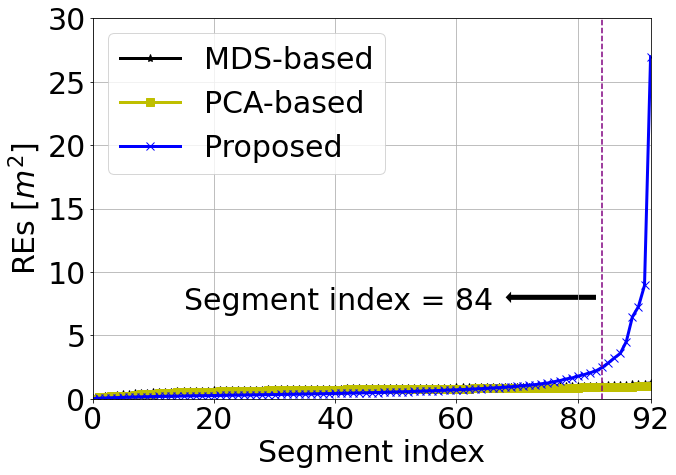

In [3]:
# ae_meanY = [2.28e-08, 3.12e-08, 3.42e-08, 3.6e-08, 3.72e-08, 3.8e-08, 3.87e-08, 3.94e-08, 4e-08, 4.07e-08, 4.14e-08, 4.19e-08, 4.24e-08, 4.3e-08, 4.35e-08, 4.4e-08, 4.45e-08, 4.49e-08, 4.54e-08, 4.58e-08, 4.62e-08, 4.67e-08, 4.71e-08, 4.75e-08, 4.78e-08, 4.82e-08, 4.86e-08, 4.9e-08, 4.93e-08, 4.97e-08, 5.01e-08, 5.05e-08, 5.09e-08, 5.13e-08, 5.17e-08, 5.21e-08, 5.25e-08, 5.27e-08, 5.31e-08, 5.36e-08, 5.39e-08, 5.43e-08, 5.46e-08, 5.5e-08, 5.53e-08, 5.57e-08, 5.61e-08, 5.64e-08, 5.68e-08, 5.71e-08, 5.75e-08, 5.78e-08, 5.82e-08, 5.86e-08, 5.89e-08, 5.93e-08, 5.97e-08, 6.01e-08, 6.05e-08, 6.09e-08, 6.13e-08, 6.18e-08, 6.22e-08, 6.26e-08, 6.31e-08, 6.35e-08, 6.39e-08, 6.43e-08, 6.48e-08, 6.53e-08, 6.58e-08, 6.64e-08, 6.69e-08, 6.75e-08, 6.8e-08, 6.85e-08, 6.91e-08, 6.98e-08, 7.05e-08, 7.11e-08, 7.18e-08, 7.26e-08, 7.35e-08, 7.43e-08, 7.51e-08, 7.61e-08, 7.72e-08, 7.82e-08, 7.95e-08, 8.11e-08, 8.29e-08, 8.55e-08, 9.04e-08]
# ae_AnomalyY = [2.3e-08, 3.13e-08, 3.32e-08, 3.51e-08, 3.63e-08, 3.76e-08, 3.86e-08, 3.93e-08, 3.99e-08, 4.08e-08, 4.14e-08, 4.2e-08, 4.26e-08, 4.3e-08, 4.36e-08, 4.4e-08, 4.45e-08, 4.49e-08, 4.53e-08, 4.59e-08, 4.63e-08, 4.67e-08, 4.7e-08, 4.74e-08, 4.79e-08, 4.82e-08, 4.86e-08, 4.9e-08, 4.93e-08, 4.97e-08, 5e-08, 5.04e-08, 5.08e-08, 5.13e-08, 5.17e-08, 5.21e-08, 5.24e-08, 5.28e-08, 5.31e-08, 5.35e-08, 5.39e-08, 5.42e-08, 5.45e-08, 5.5e-08, 5.54e-08, 5.58e-08, 5.61e-08, 5.64e-08, 5.68e-08, 5.71e-08, 5.74e-08, 5.78e-08, 5.82e-08, 5.85e-08, 5.9e-08, 5.94e-08, 5.97e-08, 6.02e-08, 6.06e-08, 6.09e-08, 6.13e-08, 6.17e-08, 6.22e-08, 6.26e-08, 6.3e-08, 6.35e-08, 6.39e-08, 6.44e-08, 6.48e-08, 6.52e-08, 6.58e-08, 6.64e-08, 6.69e-08, 6.75e-08, 6.8e-08, 6.86e-08, 6.91e-08, 6.98e-08, 7.03e-08, 7.1e-08, 7.18e-08, 7.25e-08, 7.34e-08, 7.43e-08, 7.5e-08, 7.61e-08, 7.7e-08, 7.84e-08, 7.96e-08, 8.12e-08, 8.27e-08, 8.54e-08, 9.03e-08]

# 1.0
# tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# 0.3
tsne_meanY = [0.199, 0.345, 0.378, 0.396, 0.42, 0.429, 0.449, 0.491, 0.506, 0.517, 0.544, 0.56, 0.57, 0.588, 0.607, 0.618, 0.626, 0.635, 0.643, 0.654, 0.661, 0.668, 0.676, 0.682, 0.688, 0.699, 0.707, 0.713, 0.722, 0.736, 0.743, 0.75, 0.755, 0.76, 0.766, 0.771, 0.777, 0.782, 0.787, 0.791, 0.795, 0.799, 0.804, 0.809, 0.813, 0.817, 0.821, 0.826, 0.83, 0.835, 0.839, 0.843, 0.848, 0.851, 0.855, 0.858, 0.862, 0.865, 0.869, 0.873, 0.877, 0.881, 0.884, 0.889, 0.893, 0.897, 0.901, 0.905, 0.908, 0.913, 0.917, 0.922, 0.925, 0.931, 0.935, 0.939, 0.944, 0.949, 0.953, 0.958, 0.963, 0.969, 0.974, 0.982, 0.99, 0.997, 1.005, 1.016, 1.026, 1.039, 1.054, 1.067, 1.085]
tsne_AnomalyY = [0.191, 0.34, 0.368, 0.381, 0.396, 0.41, 0.435, 0.493, 0.512, 0.527, 0.55, 0.561, 0.581, 0.596, 0.607, 0.621, 0.627, 0.634, 0.644, 0.657, 0.663, 0.669, 0.675, 0.681, 0.688, 0.694, 0.705, 0.714, 0.719, 0.735, 0.744, 0.749, 0.753, 0.759, 0.764, 0.769, 0.775, 0.781, 0.786, 0.79, 0.795, 0.799, 0.803, 0.808, 0.812, 0.817, 0.821, 0.825, 0.83, 0.834, 0.838, 0.843, 0.847, 0.852, 0.855, 0.859, 0.862, 0.865, 0.869, 0.873, 0.876, 0.88, 0.884, 0.889, 0.893, 0.896, 0.9, 0.905, 0.908, 0.913, 0.917, 0.922, 0.926, 0.932, 0.935, 0.94, 0.944, 0.949, 0.953, 0.959, 0.964, 0.969, 0.973, 0.982, 0.991, 0.998, 1.006, 1.017, 1.026, 1.039, 1.054, 1.067, 1.087]

# 1.0
# mds_meanY = [0.293, 0.391, 0.443, 0.467, 0.48, 0.496, 0.514, 0.535, 0.552, 0.565, 0.576, 0.585, 0.596, 0.607, 0.616, 0.626, 0.636, 0.644, 0.652, 0.66, 0.667, 0.674, 0.68, 0.687, 0.693, 0.7, 0.708, 0.716, 0.722, 0.729, 0.734, 0.74, 0.746, 0.752, 0.756, 0.761, 0.767, 0.773, 0.778, 0.783, 0.789, 0.793, 0.799, 0.804, 0.809, 0.813, 0.817, 0.822, 0.826, 0.83, 0.834, 0.838, 0.843, 0.847, 0.851, 0.855, 0.86, 0.864, 0.869, 0.873, 0.877, 0.881, 0.885, 0.889, 0.895, 0.899, 0.904, 0.908, 0.913, 0.919, 0.924, 0.93, 0.936, 0.942, 0.95, 0.957, 0.964, 0.972, 0.978, 0.987, 0.996, 1.004, 1.014, 1.023, 1.036, 1.052, 1.072, 1.095, 1.118, 1.144, 1.175, 1.208, 1.248]
# mds_AnomalyY = [0.023, 0.154, 0.196, 0.232, 0.271, 0.312, 0.365, 0.419, 0.451, 0.477, 0.5, 0.515, 0.529, 0.547, 0.57, 0.585, 0.6, 0.61, 0.618, 0.627, 0.634, 0.646, 0.657, 0.666, 0.676, 0.685, 0.698, 0.711, 0.72, 0.726, 0.732, 0.739, 0.744, 0.75, 0.755, 0.76, 0.766, 0.771, 0.777, 0.782, 0.788, 0.793, 0.799, 0.803, 0.809, 0.813, 0.817, 0.822, 0.826, 0.83, 0.834, 0.838, 0.843, 0.847, 0.852, 0.856, 0.861, 0.865, 0.869, 0.873, 0.878, 0.882, 0.886, 0.891, 0.896, 0.901, 0.905, 0.91, 0.915, 0.921, 0.926, 0.932, 0.939, 0.945, 0.953, 0.96, 0.968, 0.975, 0.982, 0.992, 1.001, 1.009, 1.02, 1.029, 1.043, 1.061, 1.082, 1.102, 1.128, 1.157, 1.2, 1.24, 1.293]
# 0.3
# mds_meanY = [0.139, 0.194, 0.218, 0.236, 0.25, 0.262, 0.273, 0.281, 0.29, 0.301, 0.311, 0.319, 0.326, 0.333, 0.341, 0.346, 0.352, 0.358, 0.364, 0.37, 0.378, 0.386, 0.395, 0.405, 0.416, 0.427, 0.438, 0.45, 0.462, 0.491, 0.501, 0.51, 0.516, 0.521, 0.525, 0.529, 0.533, 0.537, 0.54, 0.543, 0.546, 0.548, 0.551, 0.553, 0.556, 0.558, 0.56, 0.562, 0.564, 0.566, 0.569, 0.571, 0.573, 0.576, 0.578, 0.58, 0.582, 0.584, 0.586, 0.589, 0.591, 0.594, 0.596, 0.598, 0.601, 0.603, 0.606, 0.608, 0.611, 0.614, 0.617, 0.62, 0.623, 0.627, 0.631, 0.636, 0.641, 0.646, 0.653, 0.66, 0.668, 0.678, 0.69, 0.703, 0.718, 0.732, 0.746, 0.758, 0.772, 0.786, 0.803, 0.82, 0.841]
mds_meanY = [0.288, 0.397, 0.446, 0.477, 0.498, 0.516, 0.535, 0.553, 0.569, 0.581, 0.594, 0.604, 0.617, 0.626, 0.635, 0.642, 0.651, 0.66, 0.668, 0.675, 0.685, 0.692, 0.699, 0.706, 0.713, 0.719, 0.725, 0.732, 0.739, 0.746, 0.754, 0.761, 0.767, 0.773, 0.778, 0.783, 0.789, 0.794, 0.799, 0.804, 0.809, 0.813, 0.817, 0.822, 0.827, 0.832, 0.836, 0.84, 0.845, 0.849, 0.854, 0.858, 0.862, 0.866, 0.87, 0.873, 0.877, 0.881, 0.885, 0.888, 0.892, 0.896, 0.9, 0.904, 0.908, 0.911, 0.916, 0.921, 0.925, 0.93, 0.935, 0.941, 0.947, 0.953, 0.958, 0.964, 0.971, 0.977, 0.983, 0.992, 1.001, 1.009, 1.018, 1.03, 1.041, 1.052, 1.066, 1.08, 1.096, 1.116, 1.142, 1.169, 1.205]
# mds_AnomalyY = [0.0, 0.008, 0.01, 0.016, 0.018, 0.019, 0.027, 0.027, 0.033, 0.037, 0.043, 0.053, 0.066, 0.073, 0.073, 0.086, 0.088, 0.089, 0.09, 0.095, 0.105, 0.123, 0.143, 0.158, 0.184, 0.212, 0.258, 0.271, 0.305, 0.495, 0.503, 0.512, 0.518, 0.523, 0.527, 0.53, 0.534, 0.538, 0.541, 0.544, 0.546, 0.549, 0.551, 0.554, 0.556, 0.559, 0.561, 0.563, 0.565, 0.567, 0.57, 0.572, 0.574, 0.577, 0.579, 0.581, 0.583, 0.585, 0.587, 0.59, 0.592, 0.595, 0.597, 0.599, 0.602, 0.605, 0.607, 0.61, 0.612, 0.615, 0.619, 0.622, 0.625, 0.629, 0.633, 0.638, 0.643, 0.65, 0.657, 0.665, 0.673, 0.685, 0.697, 0.712, 0.728, 0.742, 0.756, 0.767, 0.782, 0.797, 0.815, 0.831, 0.858]
mds_AnomalyY = [0.036, 0.153, 0.204, 0.26, 0.298, 0.35, 0.398, 0.437, 0.474, 0.494, 0.516, 0.531, 0.558, 0.569, 0.586, 0.596, 0.613, 0.629, 0.638, 0.649, 0.658, 0.671, 0.683, 0.69, 0.702, 0.708, 0.714, 0.723, 0.732, 0.743, 0.75, 0.758, 0.765, 0.771, 0.777, 0.782, 0.788, 0.793, 0.798, 0.803, 0.808, 0.812, 0.817, 0.821, 0.827, 0.832, 0.836, 0.841, 0.845, 0.849, 0.854, 0.859, 0.863, 0.866, 0.87, 0.874, 0.878, 0.882, 0.885, 0.889, 0.893, 0.897, 0.901, 0.905, 0.909, 0.913, 0.917, 0.922, 0.927, 0.932, 0.937, 0.943, 0.949, 0.955, 0.96, 0.967, 0.973, 0.98, 0.987, 0.995, 1.004, 1.014, 1.025, 1.037, 1.049, 1.061, 1.075, 1.09, 1.107, 1.131, 1.161, 1.199, 1.246]

# 1.0
# pca_meanY = [0.317, 0.426, 0.462, 0.485, 0.504, 0.521, 0.538, 0.558, 0.57, 0.583, 0.594, 0.606, 0.616, 0.625, 0.632, 0.641, 0.649, 0.657, 0.664, 0.671, 0.677, 0.683, 0.688, 0.695, 0.702, 0.71, 0.718, 0.725, 0.731, 0.74, 0.745, 0.751, 0.756, 0.761, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.794, 0.799, 0.804, 0.809, 0.813, 0.817, 0.82, 0.824, 0.828, 0.832, 0.836, 0.84, 0.846, 0.85, 0.854, 0.858, 0.862, 0.866, 0.87, 0.874, 0.878, 0.882, 0.886, 0.891, 0.895, 0.9, 0.905, 0.909, 0.914, 0.918, 0.923, 0.928, 0.933, 0.939, 0.945, 0.95, 0.955, 0.961, 0.967, 0.974, 0.981, 0.988, 0.995, 1.003, 1.013, 1.023, 1.033, 1.044, 1.056, 1.072, 1.09, 1.11, 1.14]
# pca_AnomalyY = [0.049, 0.16, 0.211, 0.242, 0.286, 0.324, 0.369, 0.418, 0.445, 0.467, 0.488, 0.503, 0.525, 0.543, 0.56, 0.569, 0.584, 0.598, 0.607, 0.623, 0.638, 0.652, 0.659, 0.666, 0.677, 0.688, 0.706, 0.715, 0.724, 0.737, 0.742, 0.748, 0.754, 0.759, 0.764, 0.769, 0.773, 0.779, 0.784, 0.789, 0.793, 0.798, 0.804, 0.808, 0.812, 0.816, 0.82, 0.823, 0.828, 0.832, 0.836, 0.84, 0.846, 0.85, 0.854, 0.859, 0.863, 0.867, 0.871, 0.875, 0.879, 0.883, 0.887, 0.892, 0.897, 0.902, 0.906, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.942, 0.948, 0.953, 0.958, 0.966, 0.972, 0.979, 0.987, 0.993, 1.0, 1.008, 1.019, 1.029, 1.042, 1.055, 1.07, 1.087, 1.111, 1.138, 1.18]
# 0.3
# pca_meanY = [0.148, 0.197, 0.217, 0.231, 0.242, 0.251, 0.259, 0.283, 0.291, 0.296, 0.302, 0.306, 0.31, 0.313, 0.317, 0.32, 0.322, 0.325, 0.328, 0.331, 0.335, 0.337, 0.341, 0.345, 0.349, 0.353, 0.359, 0.364, 0.37, 0.491, 0.507, 0.517, 0.523, 0.527, 0.531, 0.534, 0.538, 0.542, 0.544, 0.547, 0.549, 0.552, 0.554, 0.556, 0.559, 0.561, 0.563, 0.565, 0.567, 0.569, 0.571, 0.573, 0.576, 0.578, 0.579, 0.581, 0.583, 0.585, 0.588, 0.59, 0.591, 0.593, 0.595, 0.597, 0.599, 0.6, 0.602, 0.604, 0.606, 0.608, 0.61, 0.612, 0.615, 0.618, 0.621, 0.626, 0.629, 0.633, 0.64, 0.643, 0.647, 0.651, 0.655, 0.661, 0.666, 0.67, 0.675, 0.68, 0.685, 0.691, 0.699, 0.705, 0.714]
pca_meanY = [0.267, 0.405, 0.432, 0.442, 0.451, 0.462, 0.47, 0.503, 0.517, 0.527, 0.536, 0.545, 0.554, 0.565, 0.574, 0.584, 0.592, 0.598, 0.603, 0.611, 0.618, 0.625, 0.63, 0.637, 0.641, 0.647, 0.653, 0.659, 0.663, 0.673, 0.677, 0.682, 0.687, 0.692, 0.698, 0.703, 0.708, 0.713, 0.718, 0.722, 0.726, 0.731, 0.735, 0.739, 0.743, 0.747, 0.751, 0.755, 0.759, 0.762, 0.766, 0.769, 0.773, 0.776, 0.78, 0.784, 0.787, 0.791, 0.795, 0.799, 0.803, 0.806, 0.809, 0.814, 0.818, 0.823, 0.826, 0.83, 0.834, 0.837, 0.841, 0.845, 0.85, 0.854, 0.858, 0.861, 0.865, 0.869, 0.873, 0.877, 0.883, 0.888, 0.893, 0.9, 0.907, 0.914, 0.923, 0.932, 0.94, 0.95, 0.961, 0.971, 0.984]
# pca_AnomalyY = [0.0, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.006, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.011, 0.011, 0.011, 0.016, 0.016, 0.016, 0.016, 0.02, 0.02, 0.5, 0.511, 0.52, 0.525, 0.529, 0.532, 0.535, 0.539, 0.543, 0.546, 0.548, 0.55, 0.553, 0.555, 0.558, 0.56, 0.562, 0.564, 0.566, 0.568, 0.57, 0.573, 0.574, 0.577, 0.579, 0.581, 0.583, 0.584, 0.586, 0.589, 0.591, 0.593, 0.595, 0.597, 0.598, 0.6, 0.602, 0.603, 0.605, 0.607, 0.609, 0.612, 0.614, 0.617, 0.62, 0.623, 0.63, 0.633, 0.636, 0.645, 0.648, 0.652, 0.656, 0.66, 0.667, 0.671, 0.677, 0.681, 0.687, 0.692, 0.698, 0.707, 0.713, 0.726]
pca_AnomalyY = [0.001, 0.14, 0.167, 0.188, 0.206, 0.222, 0.236, 0.338, 0.366, 0.394, 0.409, 0.431, 0.446, 0.477, 0.501, 0.515, 0.527, 0.539, 0.546, 0.564, 0.574, 0.586, 0.591, 0.604, 0.609, 0.618, 0.628, 0.637, 0.643, 0.668, 0.673, 0.678, 0.684, 0.69, 0.695, 0.7, 0.706, 0.71, 0.715, 0.719, 0.724, 0.729, 0.734, 0.738, 0.743, 0.747, 0.75, 0.755, 0.758, 0.762, 0.766, 0.769, 0.773, 0.777, 0.781, 0.784, 0.787, 0.791, 0.796, 0.799, 0.803, 0.806, 0.81, 0.815, 0.82, 0.824, 0.827, 0.831, 0.835, 0.839, 0.842, 0.847, 0.852, 0.856, 0.86, 0.864, 0.867, 0.872, 0.876, 0.879, 0.886, 0.891, 0.896, 0.907, 0.914, 0.921, 0.932, 0.941, 0.95, 0.961, 0.972, 0.984, 1.003]

# 1.0
# sdp_meanY = [0.095, 0.135, 0.16, 0.177, 0.196, 0.207, 0.219, 0.233, 0.247, 0.258, 0.269, 0.28, 0.291, 0.3, 0.308, 0.318, 0.328, 0.336, 0.346, 0.354, 0.364, 0.376, 0.387, 0.396, 0.408, 0.419, 0.428, 0.441, 0.455, 0.47, 0.482, 0.495, 0.51, 0.521, 0.538, 0.554, 0.567, 0.58, 0.592, 0.605, 0.622, 0.639, 0.654, 0.671, 0.689, 0.705, 0.723, 0.742, 0.762, 0.778, 0.797, 0.818, 0.841, 0.858, 0.883, 0.906, 0.938, 0.961, 0.985, 1.016, 1.046, 1.075, 1.1, 1.131, 1.175, 1.221, 1.268, 1.321, 1.364, 1.415, 1.471, 1.551, 1.623, 1.689, 1.804, 1.927, 2.04, 2.221, 2.339, 2.484, 2.608, 2.843, 3.105, 3.786, 4.345, 4.855, 6.641, 7.033, 8.697, 14.516, 16.539, 18.897, 61.299]
# sdp_AnomalyY = [0.029, 0.083, 0.108, 0.134, 0.158, 0.175, 0.193, 0.208, 0.226, 0.244, 0.255, 0.27, 0.28, 0.292, 0.299, 0.31, 0.322, 0.332, 0.34, 0.348, 0.361, 0.37, 0.381, 0.393, 0.407, 0.418, 0.427, 0.439, 0.458, 0.469, 0.482, 0.497, 0.512, 0.524, 0.54, 0.553, 0.567, 0.58, 0.591, 0.603, 0.621, 0.637, 0.651, 0.671, 0.687, 0.706, 0.723, 0.742, 0.762, 0.781, 0.8, 0.821, 0.841, 0.862, 0.887, 0.906, 0.937, 0.959, 0.982, 1.015, 1.048, 1.072, 1.101, 1.141, 1.183, 1.225, 1.274, 1.322, 1.364, 1.412, 1.47, 1.546, 1.62, 1.684, 1.813, 1.938, 2.027, 2.179, 2.343, 2.513, 2.628, 2.845, 3.094, 3.607, 4.371, 4.943, 6.217, 7.057, 8.183, 13.779, 15.217, 18.517, 50.465]
# 0.3
# sdp_meanY = [0.078, 0.126, 0.152, 0.167, 0.181, 0.192, 0.204, 0.215, 0.224, 0.234, 0.243, 0.251, 0.258, 0.267, 0.275, 0.283, 0.291, 0.299, 0.306, 0.313, 0.321, 0.328, 0.336, 0.342, 0.349, 0.355, 0.361, 0.369, 0.375, 0.383, 0.392, 0.399, 0.406, 0.414, 0.423, 0.432, 0.44, 0.448, 0.458, 0.465, 0.472, 0.481, 0.49, 0.5, 0.511, 0.522, 0.531, 0.542, 0.553, 0.564, 0.575, 0.584, 0.595, 0.607, 0.617, 0.631, 0.65, 0.668, 0.684, 0.702, 0.718, 0.735, 0.76, 0.783, 0.801, 0.822, 0.85, 0.87, 0.893, 0.924, 0.954, 0.982, 1.023, 1.065, 1.116, 1.177, 1.235, 1.297, 1.36, 1.43, 1.523, 1.604, 1.701, 1.881, 2.02, 2.273, 2.694, 3.129, 3.405, 4.748, 5.725, 7.379, 17.055]
# sdp_AnomalyY = [0.005, 0.059, 0.086, 0.116, 0.139, 0.158, 0.175, 0.191, 0.204, 0.218, 0.228, 0.241, 0.249, 0.256, 0.265, 0.275, 0.284, 0.292, 0.301, 0.308, 0.315, 0.324, 0.333, 0.339, 0.345, 0.354, 0.36, 0.368, 0.375, 0.383, 0.391, 0.398, 0.407, 0.416, 0.424, 0.433, 0.441, 0.451, 0.459, 0.466, 0.473, 0.482, 0.493, 0.5, 0.512, 0.522, 0.532, 0.544, 0.554, 0.566, 0.576, 0.587, 0.597, 0.609, 0.618, 0.634, 0.65, 0.671, 0.686, 0.699, 0.718, 0.738, 0.756, 0.775, 0.793, 0.823, 0.851, 0.874, 0.897, 0.928, 0.954, 0.986, 1.025, 1.069, 1.117, 1.181, 1.239, 1.301, 1.36, 1.423, 1.518, 1.591, 1.701, 1.911, 2.017, 2.282, 2.668, 3.092, 3.322, 4.605, 5.649, 6.835, 16.558]

# 1.0
# sdsocp_meanY = [0.053, 0.096, 0.115, 0.129, 0.141, 0.151, 0.162, 0.174, 0.183, 0.19, 0.197, 0.203, 0.209, 0.215, 0.222, 0.227, 0.233, 0.238, 0.244, 0.25, 0.256, 0.262, 0.268, 0.274, 0.281, 0.287, 0.292, 0.299, 0.306, 0.313, 0.32, 0.327, 0.335, 0.345, 0.353, 0.359, 0.365, 0.374, 0.381, 0.388, 0.397, 0.405, 0.414, 0.423, 0.432, 0.44, 0.449, 0.462, 0.474, 0.487, 0.503, 0.517, 0.532, 0.547, 0.56, 0.574, 0.591, 0.616, 0.638, 0.658, 0.68, 0.702, 0.724, 0.761, 0.789, 0.821, 0.861, 0.901, 0.928, 0.973, 1.019, 1.056, 1.111, 1.178, 1.249, 1.337, 1.449, 1.601, 1.767, 1.96, 2.164, 2.354, 2.554, 2.976, 3.419, 4.064, 4.658, 5.101, 6.358, 9.668, 11.314, 13.466, 39.606]
# sdsocp_AnomalyY = [0.006, 0.053, 0.076, 0.095, 0.11, 0.126, 0.142, 0.157, 0.167, 0.176, 0.183, 0.192, 0.199, 0.204, 0.213, 0.221, 0.227, 0.233, 0.24, 0.248, 0.254, 0.26, 0.267, 0.274, 0.28, 0.287, 0.292, 0.298, 0.305, 0.314, 0.322, 0.328, 0.336, 0.346, 0.352, 0.359, 0.366, 0.375, 0.383, 0.39, 0.398, 0.405, 0.414, 0.424, 0.432, 0.441, 0.451, 0.462, 0.476, 0.49, 0.503, 0.517, 0.531, 0.552, 0.566, 0.578, 0.592, 0.617, 0.64, 0.655, 0.679, 0.7, 0.723, 0.765, 0.793, 0.823, 0.863, 0.908, 0.938, 0.974, 1.016, 1.06, 1.1, 1.174, 1.265, 1.345, 1.468, 1.588, 1.755, 1.922, 2.12, 2.365, 2.578, 2.918, 3.301, 4.041, 4.78, 5.096, 6.367, 9.835, 10.659, 13.784, 43.74]
# 0.3
sdsocp_meanY = [0.056, 0.088, 0.107, 0.123, 0.136, 0.147, 0.156, 0.166, 0.174, 0.183, 0.19, 0.199, 0.206, 0.213, 0.221, 0.228, 0.236, 0.243, 0.248, 0.255, 0.261, 0.271, 0.278, 0.284, 0.292, 0.299, 0.306, 0.314, 0.32, 0.327, 0.334, 0.341, 0.349, 0.356, 0.367, 0.374, 0.383, 0.39, 0.4, 0.409, 0.419, 0.431, 0.441, 0.451, 0.46, 0.471, 0.482, 0.493, 0.504, 0.524, 0.537, 0.547, 0.562, 0.58, 0.597, 0.616, 0.633, 0.653, 0.674, 0.693, 0.71, 0.728, 0.748, 0.773, 0.8, 0.824, 0.848, 0.872, 0.911, 0.941, 0.984, 1.04, 1.069, 1.117, 1.174, 1.232, 1.324, 1.426, 1.528, 1.633, 1.762, 1.878, 2.021, 2.177, 2.412, 2.686, 3.163, 3.551, 4.376, 6.037, 6.995, 8.807, 21.145]
sdsocp_AnomalyY = [0.006, 0.043, 0.06, 0.08, 0.096, 0.11, 0.126, 0.14, 0.152, 0.164, 0.174, 0.184, 0.192, 0.2, 0.209, 0.219, 0.227, 0.237, 0.242, 0.248, 0.258, 0.266, 0.274, 0.281, 0.289, 0.296, 0.302, 0.312, 0.322, 0.328, 0.334, 0.342, 0.349, 0.356, 0.365, 0.374, 0.383, 0.39, 0.397, 0.408, 0.419, 0.432, 0.44, 0.449, 0.458, 0.47, 0.484, 0.494, 0.507, 0.525, 0.537, 0.551, 0.563, 0.582, 0.599, 0.616, 0.632, 0.653, 0.677, 0.692, 0.71, 0.731, 0.752, 0.775, 0.801, 0.827, 0.851, 0.877, 0.915, 0.947, 0.99, 1.043, 1.074, 1.118, 1.188, 1.24, 1.34, 1.427, 1.557, 1.637, 1.784, 1.903, 2.047, 2.204, 2.47, 2.816, 3.213, 3.574, 4.511, 6.457, 7.267, 8.935, 26.974]

import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1,1, figsize = (10,7))

# tsne_meanY = np.concatenate((np.array(tsne_meanY)[0:40], np.zeros(53)))
# tsne_AnomalyY = np.concatenate((np.array(tsne_AnomalyY)[0:40], np.zeros(53)))

# mds_meanY = np.concatenate((np.array(mds_meanY)[0:40], np.zeros(53)))
# mds_AnomalyY = np.concatenate((np.array(mds_AnomalyY)[0:40], np.zeros(53)))

# pca_meanY = np.concatenate((np.array(pca_meanY)[0:40], np.zeros(53)))
# pca_AnomalyY = np.concatenate((np.array(pca_AnomalyY)[0:40], np.zeros(53)))

# ae_meanY = np.concatenate((np.array(ae_meanY)[0:40], np.zeros(53)))
# ae_AnomalyY = np.concatenate((np.array(ae_AnomalyY)[0:40], np.zeros(53)))

# sdsocp_meanY = np.concatenate((np.array(sdsocp_meanY)[0:40], np.zeros(53)))
# sdsocp_AnomalyY = np.concatenate((np.array(sdsocp_AnomalyY)[0:40], np.zeros(53)))

x = np.arange(0, len(sdsocp_meanY), 1)
# ax1.plot(x,np.abs(np.array(tsne_meanY) - np.array(tsne_AnomalyY)), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
# ax1.plot(x,np.abs(np.array(mds_meanY) - np.array(mds_AnomalyY)), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
# ax1.plot(x,np.abs(np.array(pca_meanY) - np.array(pca_AnomalyY)), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,np.abs(np.array(ae_meanY) - np.array(ae_AnomalyY)), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
# ax1.plot(x,np.abs(np.array(sdsocp_meanY) - np.array(sdsocp_AnomalyY)), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

# ax1.plot(x,np.array(tsne_meanY), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
# ax1.plot(x,np.array(mds_meanY), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
# ax1.plot(x,np.array(pca_meanY), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,np.array(ae_meanY), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
# ax1.plot(x,np.array(sdsocp_meanY), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

# ax1.plot(x,np.array(tsne_AnomalyY), label= "t-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
ax1.plot(x,np.array(mds_AnomalyY), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
ax1.plot(x,np.array(pca_AnomalyY), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,np.array(ae_AnomalyY), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
ax1.plot(x,np.array(sdsocp_AnomalyY), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

# ax1.plot(x,(np.array(tsne_meanY) + np.array(tsne_AnomalyY)), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
# ax1.plot(x,(np.array(mds_meanY) + np.array(mds_AnomalyY)), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
# ax1.plot(x,(np.array(pca_meanY) + np.array(pca_AnomalyY)), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,(np.array(ae_meanY) + np.array(ae_AnomalyY)), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
# ax1.plot(x,(np.array(sdsocp_meanY) + np.array(sdsocp_AnomalyY)), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

font_size = 30

# plt.axvline(x = 92, color = 'purple', ls='--')
plt.axvline(x = 84, color = 'purple', ls='--')
# plt.axvline(x = 56, color = 'purple', ls='--')

ax1.legend(loc='upper left', prop={'size': font_size})
ax1.set_xlabel('Segment index', fontsize=font_size)
ax1.set_ylabel(r'REs [$m^2$]', fontsize=font_size)
ax1.set_ylim([0, 30])
ax1.set_xlim([0,92])
ax1.text(15, 7, "Segment index = 84", fontsize=font_size)
ax1.arrow(83, 8, -14, 0, width = 0.4, facecolor='black', edgecolor='none', head_length=0.9, head_width=0.9)
plt.xticks([0, 20, 40, 60, 80, 92], ["0", "20", "40", "60", "80", "92"], fontsize=font_size)
# plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ["0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid()

plt.savefig("anomaly_detection_reconstruction_error_03_3anomaly.png", bbox_inches='tight')
plt.savefig("anomaly_detection_reconstruction_error_03_3anomaly.eps", bbox_inches='tight')
# files.download("anomaly_detection_reconstruction_error_03_3anomaly.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


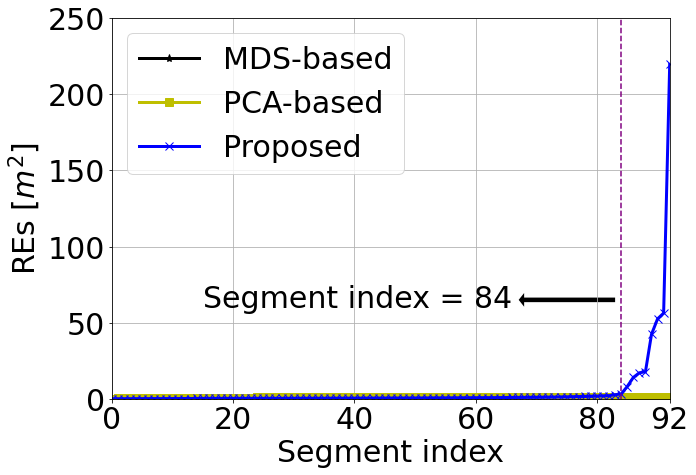

In [4]:
# 3
# ae_meanY = [2.82e-08, 3.78e-08, 4.16e-08, 4.36e-08, 4.51e-08, 4.63e-08, 4.72e-08, 4.82e-08, 4.92e-08, 5.01e-08, 5.09e-08, 5.17e-08, 5.24e-08, 5.3e-08, 5.37e-08, 5.43e-08, 5.49e-08, 5.55e-08, 5.6e-08, 5.65e-08, 5.71e-08, 5.76e-08, 5.81e-08, 5.86e-08, 5.91e-08, 5.96e-08, 6.01e-08, 6.07e-08, 6.11e-08, 6.16e-08, 6.21e-08, 6.26e-08, 6.32e-08, 6.37e-08, 6.42e-08, 6.46e-08, 6.51e-08, 6.56e-08, 6.61e-08, 6.67e-08, 6.72e-08, 6.76e-08, 6.81e-08, 6.88e-08, 6.93e-08, 6.98e-08, 7.03e-08, 7.08e-08, 7.13e-08, 7.18e-08, 7.23e-08, 7.28e-08, 7.32e-08, 7.37e-08, 7.43e-08, 7.48e-08, 7.53e-08, 7.58e-08, 7.64e-08, 7.69e-08, 7.74e-08, 7.79e-08, 7.85e-08, 7.9e-08, 7.95e-08, 8.02e-08, 8.08e-08, 8.14e-08, 8.2e-08, 8.27e-08, 8.35e-08, 8.41e-08, 8.49e-08, 8.55e-08, 8.63e-08, 8.7e-08, 8.77e-08, 8.85e-08, 8.93e-08, 9.01e-08, 9.12e-08, 9.21e-08, 9.31e-08, 9.42e-08, 9.55e-08, 9.68e-08, 9.84e-08, 9.99e-08, 1.016e-07, 1.036e-07, 1.064e-07, 1.102e-07, 1.169e-07]
# ae_AnomalyY = [2.51e-08, 3.7e-08, 4.1e-08, 4.36e-08, 4.55e-08, 4.62e-08, 4.73e-08, 4.81e-08, 4.92e-08, 5.01e-08, 5.08e-08, 5.17e-08, 5.24e-08, 5.3e-08, 5.37e-08, 5.43e-08, 5.49e-08, 5.56e-08, 5.61e-08, 5.66e-08, 5.7e-08, 5.76e-08, 5.82e-08, 5.87e-08, 5.92e-08, 5.97e-08, 6.02e-08, 6.06e-08, 6.11e-08, 6.15e-08, 6.22e-08, 6.27e-08, 6.32e-08, 6.36e-08, 6.42e-08, 6.46e-08, 6.5e-08, 6.56e-08, 6.61e-08, 6.67e-08, 6.72e-08, 6.77e-08, 6.82e-08, 6.88e-08, 6.94e-08, 6.99e-08, 7.04e-08, 7.09e-08, 7.14e-08, 7.18e-08, 7.22e-08, 7.28e-08, 7.32e-08, 7.37e-08, 7.43e-08, 7.49e-08, 7.53e-08, 7.58e-08, 7.63e-08, 7.69e-08, 7.74e-08, 7.8e-08, 7.84e-08, 7.89e-08, 7.94e-08, 8e-08, 8.08e-08, 8.14e-08, 8.21e-08, 8.27e-08, 8.35e-08, 8.41e-08, 8.48e-08, 8.55e-08, 8.63e-08, 8.7e-08, 8.76e-08, 8.84e-08, 8.93e-08, 9.01e-08, 9.11e-08, 9.18e-08, 9.31e-08, 9.41e-08, 9.53e-08, 9.69e-08, 9.85e-08, 9.98e-08, 1.019e-07, 1.035e-07, 1.066e-07, 1.101e-07, 1.163e-07]

tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]

# pca_meanY = [0.171, 0.232, 0.251, 0.265, 0.274, 0.283, 0.295, 0.322, 0.329, 0.334, 0.338, 0.341, 0.345, 0.348, 0.351, 0.353, 0.356, 0.359, 0.362, 0.365, 0.368, 0.371, 0.374, 0.378, 0.382, 0.386, 0.39, 0.394, 0.4, 0.484, 0.5, 0.51, 0.515, 0.52, 0.524, 0.528, 0.531, 0.535, 0.538, 0.54, 0.543, 0.545, 0.547, 0.551, 0.553, 0.555, 0.557, 0.559, 0.562, 0.564, 0.565, 0.567, 0.569, 0.571, 0.573, 0.575, 0.577, 0.579, 0.582, 0.584, 0.586, 0.589, 0.591, 0.593, 0.595, 0.597, 0.599, 0.601, 0.603, 0.605, 0.607, 0.609, 0.611, 0.616, 0.619, 0.621, 0.623, 0.626, 0.629, 0.632, 0.634, 0.637, 0.64, 0.644, 0.647, 0.65, 0.654, 0.659, 0.664, 0.669, 0.675, 0.684, 0.7]
pca_meanY = [0.385, 0.579, 0.623, 0.646, 0.663, 0.677, 0.688, 0.708, 0.726, 0.741, 0.753, 0.764, 0.772, 0.783, 0.793, 0.806, 0.818, 0.828, 0.836, 0.845, 0.854, 0.861, 0.868, 0.875, 0.883, 0.889, 0.897, 0.903, 0.91, 0.919, 0.927, 0.935, 0.942, 0.951, 0.957, 0.962, 0.967, 0.973, 0.978, 0.984, 0.99, 0.995, 1.001, 1.006, 1.011, 1.016, 1.021, 1.026, 1.032, 1.037, 1.042, 1.046, 1.051, 1.056, 1.062, 1.067, 1.071, 1.078, 1.083, 1.087, 1.09, 1.096, 1.1, 1.105, 1.111, 1.116, 1.123, 1.129, 1.135, 1.14, 1.145, 1.152, 1.158, 1.163, 1.168, 1.173, 1.178, 1.185, 1.191, 1.196, 1.203, 1.209, 1.215, 1.226, 1.238, 1.246, 1.258, 1.267, 1.277, 1.293, 1.305, 1.317, 1.333]
# pca_AnomalyY = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.008, 0.008, 0.016, 0.017, 0.025, 0.029, 0.037, 0.037, 0.046, 0.055, 0.065, 0.494, 0.506, 0.514, 0.518, 0.523, 0.526, 0.529, 0.532, 0.537, 0.54, 0.542, 0.544, 0.546, 0.548, 0.552, 0.555, 0.556, 0.558, 0.56, 0.563, 0.565, 0.567, 0.568, 0.57, 0.572, 0.574, 0.576, 0.578, 0.58, 0.584, 0.585, 0.588, 0.59, 0.592, 0.595, 0.597, 0.599, 0.601, 0.603, 0.605, 0.607, 0.609, 0.611, 0.613, 0.619, 0.622, 0.624, 0.626, 0.629, 0.632, 0.634, 0.637, 0.64, 0.642, 0.647, 0.65, 0.654, 0.658, 0.663, 0.669, 0.675, 0.682, 0.693, 0.717]
pca_AnomalyY = [0.014, 0.215, 0.3, 0.346, 0.396, 0.431, 0.462, 0.531, 0.573, 0.602, 0.628, 0.646, 0.659, 0.701, 0.725, 0.748, 0.764, 0.775, 0.786, 0.804, 0.818, 0.826, 0.838, 0.847, 0.863, 0.868, 0.878, 0.888, 0.895, 0.914, 0.922, 0.931, 0.939, 0.948, 0.954, 0.959, 0.964, 0.97, 0.976, 0.982, 0.988, 0.993, 1.0, 1.005, 1.01, 1.015, 1.02, 1.025, 1.031, 1.037, 1.041, 1.046, 1.05, 1.056, 1.062, 1.066, 1.071, 1.078, 1.083, 1.087, 1.091, 1.097, 1.101, 1.107, 1.112, 1.118, 1.124, 1.131, 1.137, 1.141, 1.146, 1.153, 1.158, 1.164, 1.17, 1.175, 1.179, 1.188, 1.193, 1.198, 1.206, 1.212, 1.217, 1.239, 1.253, 1.26, 1.273, 1.282, 1.291, 1.309, 1.322, 1.333, 1.356]

# mds_meanY = [0.136, 0.185, 0.212, 0.228, 0.239, 0.251, 0.261, 0.269, 0.277, 0.286, 0.293, 0.3, 0.308, 0.316, 0.323, 0.33, 0.337, 0.345, 0.352, 0.362, 0.373, 0.385, 0.398, 0.414, 0.433, 0.451, 0.472, 0.488, 0.502, 0.515, 0.525, 0.532, 0.54, 0.545, 0.55, 0.555, 0.559, 0.562, 0.566, 0.569, 0.573, 0.577, 0.58, 0.583, 0.586, 0.589, 0.592, 0.595, 0.597, 0.6, 0.603, 0.607, 0.61, 0.613, 0.615, 0.618, 0.621, 0.624, 0.628, 0.631, 0.635, 0.639, 0.642, 0.645, 0.649, 0.653, 0.658, 0.663, 0.668, 0.675, 0.681, 0.688, 0.693, 0.701, 0.709, 0.717, 0.725, 0.734, 0.744, 0.755, 0.769, 0.784, 0.798, 0.815, 0.837, 0.859, 0.886, 0.92, 0.956, 0.996, 1.035, 1.079, 1.118]
mds_meanY = [0.287, 0.401, 0.45, 0.478, 0.499, 0.516, 0.536, 0.557, 0.573, 0.588, 0.602, 0.615, 0.629, 0.643, 0.654, 0.666, 0.675, 0.683, 0.692, 0.701, 0.711, 0.721, 0.729, 0.738, 0.746, 0.753, 0.762, 0.769, 0.777, 0.784, 0.791, 0.798, 0.804, 0.81, 0.817, 0.823, 0.83, 0.837, 0.843, 0.85, 0.855, 0.86, 0.867, 0.872, 0.877, 0.882, 0.888, 0.893, 0.899, 0.904, 0.908, 0.913, 0.917, 0.922, 0.927, 0.931, 0.937, 0.943, 0.947, 0.952, 0.957, 0.962, 0.968, 0.974, 0.98, 0.985, 0.99, 0.997, 1.004, 1.011, 1.019, 1.027, 1.035, 1.044, 1.054, 1.063, 1.074, 1.085, 1.097, 1.108, 1.12, 1.134, 1.151, 1.169, 1.191, 1.211, 1.235, 1.26, 1.289, 1.318, 1.35, 1.388, 1.44]
# mds_AnomalyY = [0.003, 0.007, 0.007, 0.01, 0.013, 0.017, 0.019, 0.02, 0.027, 0.034, 0.037, 0.038, 0.038, 0.043, 0.046, 0.046, 0.055, 0.06, 0.08, 0.089, 0.097, 0.142, 0.175, 0.218, 0.285, 0.344, 0.405, 0.467, 0.49, 0.523, 0.53, 0.537, 0.543, 0.548, 0.552, 0.556, 0.561, 0.564, 0.567, 0.571, 0.574, 0.578, 0.581, 0.584, 0.587, 0.59, 0.593, 0.596, 0.598, 0.601, 0.605, 0.608, 0.611, 0.614, 0.616, 0.62, 0.622, 0.626, 0.629, 0.633, 0.637, 0.641, 0.644, 0.647, 0.651, 0.655, 0.66, 0.665, 0.67, 0.676, 0.683, 0.689, 0.693, 0.704, 0.71, 0.718, 0.728, 0.735, 0.745, 0.756, 0.77, 0.781, 0.791, 0.817, 0.838, 0.855, 0.881, 0.924, 0.972, 1.015, 1.057, 1.106, 1.145]
mds_AnomalyY = [0.054, 0.173, 0.226, 0.275, 0.33, 0.372, 0.418, 0.459, 0.484, 0.509, 0.54, 0.556, 0.579, 0.607, 0.626, 0.638, 0.649, 0.661, 0.671, 0.68, 0.692, 0.705, 0.716, 0.727, 0.738, 0.746, 0.754, 0.764, 0.77, 0.782, 0.789, 0.796, 0.803, 0.809, 0.816, 0.822, 0.829, 0.836, 0.843, 0.849, 0.854, 0.86, 0.866, 0.871, 0.877, 0.882, 0.888, 0.894, 0.899, 0.904, 0.908, 0.913, 0.918, 0.922, 0.927, 0.932, 0.938, 0.943, 0.948, 0.953, 0.958, 0.964, 0.969, 0.975, 0.981, 0.986, 0.993, 0.999, 1.006, 1.013, 1.021, 1.03, 1.039, 1.047, 1.058, 1.068, 1.079, 1.089, 1.101, 1.113, 1.126, 1.141, 1.159, 1.177, 1.198, 1.222, 1.244, 1.268, 1.299, 1.331, 1.365, 1.423, 1.499]

sdsocp_meanY = [0.052, 0.087, 0.103, 0.119, 0.129, 0.138, 0.151, 0.162, 0.17, 0.18, 0.186, 0.194, 0.201, 0.208, 0.214, 0.219, 0.227, 0.233, 0.239, 0.245, 0.251, 0.257, 0.262, 0.268, 0.276, 0.283, 0.29, 0.299, 0.305, 0.314, 0.323, 0.329, 0.336, 0.343, 0.351, 0.36, 0.369, 0.378, 0.388, 0.397, 0.406, 0.421, 0.432, 0.443, 0.454, 0.466, 0.475, 0.486, 0.496, 0.508, 0.519, 0.532, 0.55, 0.57, 0.587, 0.603, 0.623, 0.642, 0.664, 0.683, 0.704, 0.73, 0.75, 0.771, 0.794, 0.826, 0.857, 0.887, 0.911, 0.955, 0.997, 1.037, 1.088, 1.126, 1.216, 1.286, 1.355, 1.449, 1.534, 1.636, 1.773, 1.928, 2.031, 2.677, 3.089, 8.32, 16.685, 17.009, 17.699, 47.093, 49.156, 56.151, 219.496]
sdsocp_AnomalyY = [0.01, 0.046, 0.065, 0.078, 0.093, 0.109, 0.12, 0.137, 0.145, 0.154, 0.165, 0.175, 0.186, 0.193, 0.2, 0.209, 0.219, 0.227, 0.234, 0.24, 0.246, 0.252, 0.258, 0.265, 0.271, 0.28, 0.287, 0.297, 0.305, 0.316, 0.322, 0.33, 0.336, 0.344, 0.351, 0.359, 0.371, 0.38, 0.389, 0.398, 0.407, 0.419, 0.431, 0.446, 0.456, 0.466, 0.478, 0.489, 0.501, 0.511, 0.52, 0.531, 0.553, 0.575, 0.59, 0.607, 0.622, 0.646, 0.666, 0.687, 0.706, 0.733, 0.751, 0.771, 0.801, 0.835, 0.858, 0.887, 0.917, 0.954, 0.999, 1.033, 1.081, 1.132, 1.217, 1.272, 1.367, 1.47, 1.536, 1.652, 1.791, 1.94, 2.048, 2.687, 3.17, 8.075, 14.032, 17.08, 17.755, 42.376, 52.533, 56.301, 219.746]

# sdp_meanY = [0.072, 0.12, 0.142, 0.163, 0.183, 0.196, 0.209, 0.225, 0.238, 0.253, 0.264, 0.278, 0.288, 0.296, 0.305, 0.315, 0.325, 0.333, 0.343, 0.35, 0.362, 0.373, 0.383, 0.394, 0.407, 0.419, 0.428, 0.44, 0.457, 0.47, 0.483, 0.496, 0.51, 0.523, 0.54, 0.554, 0.567, 0.58, 0.591, 0.603, 0.621, 0.638, 0.653, 0.671, 0.688, 0.705, 0.724, 0.743, 0.762, 0.778, 0.798, 0.82, 0.842, 0.861, 0.884, 0.906, 0.938, 0.96, 0.982, 1.016, 1.047, 1.075, 1.102, 1.136, 1.18, 1.224, 1.272, 1.319, 1.365, 1.413, 1.469, 1.549, 1.619, 1.682, 1.807, 1.934, 2.031, 2.2, 2.334, 2.498, 2.617, 2.839, 3.106, 3.706, 4.355, 4.883, 6.387, 7.062, 8.553, 14.371, 15.695, 18.699, 56.124]
# sdp_AnomalyY = [0.068, 0.107, 0.138, 0.158, 0.18, 0.195, 0.209, 0.221, 0.24, 0.254, 0.262, 0.274, 0.286, 0.297, 0.305, 0.316, 0.328, 0.336, 0.345, 0.354, 0.365, 0.375, 0.387, 0.396, 0.408, 0.418, 0.427, 0.44, 0.455, 0.469, 0.48, 0.496, 0.51, 0.52, 0.537, 0.551, 0.566, 0.58, 0.593, 0.606, 0.622, 0.639, 0.654, 0.671, 0.69, 0.706, 0.721, 0.739, 0.763, 0.781, 0.799, 0.819, 0.838, 0.858, 0.886, 0.907, 0.937, 0.962, 0.987, 1.016, 1.046, 1.071, 1.097, 1.132, 1.174, 1.221, 1.267, 1.325, 1.362, 1.416, 1.474, 1.549, 1.626, 1.695, 1.808, 1.926, 2.041, 2.214, 2.353, 2.49, 2.613, 2.851, 3.091, 3.74, 4.353, 4.895, 6.641, 7.009, 8.423, 14.021, 16.624, 18.849, 59.089]

import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(1,1, figsize = (10,7))

# tsne_meanY = np.concatenate((np.array(tsne_meanY)[0:40], np.zeros(53)))
# tsne_AnomalyY = np.concatenate((np.array(tsne_AnomalyY)[0:40], np.zeros(53)))

# mds_meanY = np.concatenate((np.array(mds_meanY)[0:40], np.zeros(53)))
# mds_AnomalyY = np.concatenate((np.array(mds_AnomalyY)[0:40], np.zeros(53)))

# pca_meanY = np.concatenate((np.array(pca_meanY)[0:40], np.zeros(53)))
# pca_AnomalyY = np.concatenate((np.array(pca_AnomalyY)[0:40], np.zeros(53)))

# ae_meanY = np.concatenate((np.array(ae_meanY)[0:40], np.zeros(53)))
# ae_AnomalyY = np.concatenate((np.array(ae_AnomalyY)[0:40], np.zeros(53)))

# sdsocp_meanY = np.concatenate((np.array(sdsocp_meanY)[0:40], np.zeros(53)))
# sdsocp_AnomalyY = np.concatenate((np.array(sdsocp_AnomalyY)[0:40], np.zeros(53)))

# ax1.plot(x,np.abs(np.array(tsne_meanY) - np.array(tsne_AnomalyY)), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
# ax1.plot(x,np.abs(np.array(mds_meanY) - np.array(mds_AnomalyY)), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
# ax1.plot(x,np.abs(np.array(pca_meanY) - np.array(pca_AnomalyY)), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,np.abs(np.array(ae_meanY) - np.array(ae_AnomalyY)), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
# ax1.plot(x,np.abs(np.array(sdsocp_meanY) - np.array(sdsocp_AnomalyY)), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

# ax1.plot(x,np.array(tsne_AnomalyY), label= "t-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
ax1.plot(x,np.array(mds_AnomalyY), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
ax1.plot(x,np.array(pca_AnomalyY), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
# ax1.plot(x,np.array(ae_AnomalyY), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
ax1.plot(x,np.array(sdsocp_AnomalyY), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

font_size = 30

# plt.axvline(x = 92, color = 'purple', ls='--')
plt.axvline(x = 84, color = 'purple', ls='--')
# plt.axvline(x = 56, color = 'purple', ls='--')

ax1.legend(loc='upper left', prop={'size': font_size})
ax1.set_xlabel('Segment index', fontsize=font_size)
ax1.set_ylabel(r'REs [$m^2$]', fontsize=font_size)
ax1.set_ylim([0, 250])
ax1.set_xlim([0,92])
ax1.text(15, 60, "Segment index = 84", fontsize=font_size)
ax1.arrow(83, 65, -15, 0, width = 3, facecolor='black', edgecolor='none', head_length=0.9, head_width=9)
plt.xticks([0, 20, 40, 60, 80, 92], ["0", "20", "40", "60", "80", "92"], fontsize=font_size)
# plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5], ["0", "0.5", "1.0", "1.5", "2.0", "2.5", "3.0", "3.5"], fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid()

plt.savefig("anomaly_detection_reconstruction_error_3_3anomaly.png", bbox_inches='tight')
plt.savefig("anomaly_detection_reconstruction_error_3_3anomaly.eps", bbox_inches='tight')
# files.download("anomaly_detection_reconstruction_error_3_3anomaly.eps")

In [ ]:
from google.colab import drive, files
files.download("anomaly_detection_reconstruction_error_03_3anomaly.png")
files.download("anomaly_detection_reconstruction_error_3_3anomaly.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
from google.colab import drive, files
files.download("anomaly_detection_reconstruction_error_03_3anomaly.eps")
files.download("anomaly_detection_reconstruction_error_3_3anomaly.eps")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[80 82 84 86 88 90 92]
[0.  0.5 1.  1.5 2. ]


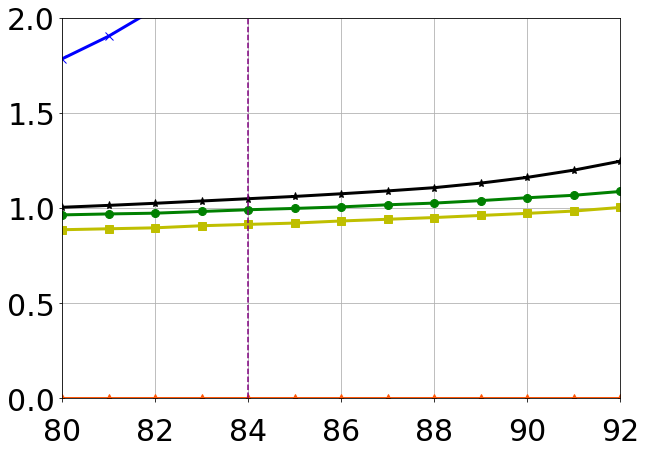

In [ ]:
ae_meanY = [2.28e-08, 3.12e-08, 3.42e-08, 3.6e-08, 3.72e-08, 3.8e-08, 3.87e-08, 3.94e-08, 4e-08, 4.07e-08, 4.14e-08, 4.19e-08, 4.24e-08, 4.3e-08, 4.35e-08, 4.4e-08, 4.45e-08, 4.49e-08, 4.54e-08, 4.58e-08, 4.62e-08, 4.67e-08, 4.71e-08, 4.75e-08, 4.78e-08, 4.82e-08, 4.86e-08, 4.9e-08, 4.93e-08, 4.97e-08, 5.01e-08, 5.05e-08, 5.09e-08, 5.13e-08, 5.17e-08, 5.21e-08, 5.25e-08, 5.27e-08, 5.31e-08, 5.36e-08, 5.39e-08, 5.43e-08, 5.46e-08, 5.5e-08, 5.53e-08, 5.57e-08, 5.61e-08, 5.64e-08, 5.68e-08, 5.71e-08, 5.75e-08, 5.78e-08, 5.82e-08, 5.86e-08, 5.89e-08, 5.93e-08, 5.97e-08, 6.01e-08, 6.05e-08, 6.09e-08, 6.13e-08, 6.18e-08, 6.22e-08, 6.26e-08, 6.31e-08, 6.35e-08, 6.39e-08, 6.43e-08, 6.48e-08, 6.53e-08, 6.58e-08, 6.64e-08, 6.69e-08, 6.75e-08, 6.8e-08, 6.85e-08, 6.91e-08, 6.98e-08, 7.05e-08, 7.11e-08, 7.18e-08, 7.26e-08, 7.35e-08, 7.43e-08, 7.51e-08, 7.61e-08, 7.72e-08, 7.82e-08, 7.95e-08, 8.11e-08, 8.29e-08, 8.55e-08, 9.04e-08]
ae_AnomalyY = [2.3e-08, 3.13e-08, 3.32e-08, 3.51e-08, 3.63e-08, 3.76e-08, 3.86e-08, 3.93e-08, 3.99e-08, 4.08e-08, 4.14e-08, 4.2e-08, 4.26e-08, 4.3e-08, 4.36e-08, 4.4e-08, 4.45e-08, 4.49e-08, 4.53e-08, 4.59e-08, 4.63e-08, 4.67e-08, 4.7e-08, 4.74e-08, 4.79e-08, 4.82e-08, 4.86e-08, 4.9e-08, 4.93e-08, 4.97e-08, 5e-08, 5.04e-08, 5.08e-08, 5.13e-08, 5.17e-08, 5.21e-08, 5.24e-08, 5.28e-08, 5.31e-08, 5.35e-08, 5.39e-08, 5.42e-08, 5.45e-08, 5.5e-08, 5.54e-08, 5.58e-08, 5.61e-08, 5.64e-08, 5.68e-08, 5.71e-08, 5.74e-08, 5.78e-08, 5.82e-08, 5.85e-08, 5.9e-08, 5.94e-08, 5.97e-08, 6.02e-08, 6.06e-08, 6.09e-08, 6.13e-08, 6.17e-08, 6.22e-08, 6.26e-08, 6.3e-08, 6.35e-08, 6.39e-08, 6.44e-08, 6.48e-08, 6.52e-08, 6.58e-08, 6.64e-08, 6.69e-08, 6.75e-08, 6.8e-08, 6.86e-08, 6.91e-08, 6.98e-08, 7.03e-08, 7.1e-08, 7.18e-08, 7.25e-08, 7.34e-08, 7.43e-08, 7.5e-08, 7.61e-08, 7.7e-08, 7.84e-08, 7.96e-08, 8.12e-08, 8.27e-08, 8.54e-08, 9.03e-08]

# 1.0
# tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# 0.3
tsne_meanY = [0.199, 0.345, 0.378, 0.396, 0.42, 0.429, 0.449, 0.491, 0.506, 0.517, 0.544, 0.56, 0.57, 0.588, 0.607, 0.618, 0.626, 0.635, 0.643, 0.654, 0.661, 0.668, 0.676, 0.682, 0.688, 0.699, 0.707, 0.713, 0.722, 0.736, 0.743, 0.75, 0.755, 0.76, 0.766, 0.771, 0.777, 0.782, 0.787, 0.791, 0.795, 0.799, 0.804, 0.809, 0.813, 0.817, 0.821, 0.826, 0.83, 0.835, 0.839, 0.843, 0.848, 0.851, 0.855, 0.858, 0.862, 0.865, 0.869, 0.873, 0.877, 0.881, 0.884, 0.889, 0.893, 0.897, 0.901, 0.905, 0.908, 0.913, 0.917, 0.922, 0.925, 0.931, 0.935, 0.939, 0.944, 0.949, 0.953, 0.958, 0.963, 0.969, 0.974, 0.982, 0.99, 0.997, 1.005, 1.016, 1.026, 1.039, 1.054, 1.067, 1.085]
tsne_AnomalyY = [0.191, 0.34, 0.368, 0.381, 0.396, 0.41, 0.435, 0.493, 0.512, 0.527, 0.55, 0.561, 0.581, 0.596, 0.607, 0.621, 0.627, 0.634, 0.644, 0.657, 0.663, 0.669, 0.675, 0.681, 0.688, 0.694, 0.705, 0.714, 0.719, 0.735, 0.744, 0.749, 0.753, 0.759, 0.764, 0.769, 0.775, 0.781, 0.786, 0.79, 0.795, 0.799, 0.803, 0.808, 0.812, 0.817, 0.821, 0.825, 0.83, 0.834, 0.838, 0.843, 0.847, 0.852, 0.855, 0.859, 0.862, 0.865, 0.869, 0.873, 0.876, 0.88, 0.884, 0.889, 0.893, 0.896, 0.9, 0.905, 0.908, 0.913, 0.917, 0.922, 0.926, 0.932, 0.935, 0.94, 0.944, 0.949, 0.953, 0.959, 0.964, 0.969, 0.973, 0.982, 0.991, 0.998, 1.006, 1.017, 1.026, 1.039, 1.054, 1.067, 1.087]

# 1.0
# mds_meanY = [0.293, 0.391, 0.443, 0.467, 0.48, 0.496, 0.514, 0.535, 0.552, 0.565, 0.576, 0.585, 0.596, 0.607, 0.616, 0.626, 0.636, 0.644, 0.652, 0.66, 0.667, 0.674, 0.68, 0.687, 0.693, 0.7, 0.708, 0.716, 0.722, 0.729, 0.734, 0.74, 0.746, 0.752, 0.756, 0.761, 0.767, 0.773, 0.778, 0.783, 0.789, 0.793, 0.799, 0.804, 0.809, 0.813, 0.817, 0.822, 0.826, 0.83, 0.834, 0.838, 0.843, 0.847, 0.851, 0.855, 0.86, 0.864, 0.869, 0.873, 0.877, 0.881, 0.885, 0.889, 0.895, 0.899, 0.904, 0.908, 0.913, 0.919, 0.924, 0.93, 0.936, 0.942, 0.95, 0.957, 0.964, 0.972, 0.978, 0.987, 0.996, 1.004, 1.014, 1.023, 1.036, 1.052, 1.072, 1.095, 1.118, 1.144, 1.175, 1.208, 1.248]
# mds_AnomalyY = [0.023, 0.154, 0.196, 0.232, 0.271, 0.312, 0.365, 0.419, 0.451, 0.477, 0.5, 0.515, 0.529, 0.547, 0.57, 0.585, 0.6, 0.61, 0.618, 0.627, 0.634, 0.646, 0.657, 0.666, 0.676, 0.685, 0.698, 0.711, 0.72, 0.726, 0.732, 0.739, 0.744, 0.75, 0.755, 0.76, 0.766, 0.771, 0.777, 0.782, 0.788, 0.793, 0.799, 0.803, 0.809, 0.813, 0.817, 0.822, 0.826, 0.83, 0.834, 0.838, 0.843, 0.847, 0.852, 0.856, 0.861, 0.865, 0.869, 0.873, 0.878, 0.882, 0.886, 0.891, 0.896, 0.901, 0.905, 0.91, 0.915, 0.921, 0.926, 0.932, 0.939, 0.945, 0.953, 0.96, 0.968, 0.975, 0.982, 0.992, 1.001, 1.009, 1.02, 1.029, 1.043, 1.061, 1.082, 1.102, 1.128, 1.157, 1.2, 1.24, 1.293]
# 0.3
# mds_meanY = [0.139, 0.194, 0.218, 0.236, 0.25, 0.262, 0.273, 0.281, 0.29, 0.301, 0.311, 0.319, 0.326, 0.333, 0.341, 0.346, 0.352, 0.358, 0.364, 0.37, 0.378, 0.386, 0.395, 0.405, 0.416, 0.427, 0.438, 0.45, 0.462, 0.491, 0.501, 0.51, 0.516, 0.521, 0.525, 0.529, 0.533, 0.537, 0.54, 0.543, 0.546, 0.548, 0.551, 0.553, 0.556, 0.558, 0.56, 0.562, 0.564, 0.566, 0.569, 0.571, 0.573, 0.576, 0.578, 0.58, 0.582, 0.584, 0.586, 0.589, 0.591, 0.594, 0.596, 0.598, 0.601, 0.603, 0.606, 0.608, 0.611, 0.614, 0.617, 0.62, 0.623, 0.627, 0.631, 0.636, 0.641, 0.646, 0.653, 0.66, 0.668, 0.678, 0.69, 0.703, 0.718, 0.732, 0.746, 0.758, 0.772, 0.786, 0.803, 0.82, 0.841]
mds_meanY = [0.288, 0.397, 0.446, 0.477, 0.498, 0.516, 0.535, 0.553, 0.569, 0.581, 0.594, 0.604, 0.617, 0.626, 0.635, 0.642, 0.651, 0.66, 0.668, 0.675, 0.685, 0.692, 0.699, 0.706, 0.713, 0.719, 0.725, 0.732, 0.739, 0.746, 0.754, 0.761, 0.767, 0.773, 0.778, 0.783, 0.789, 0.794, 0.799, 0.804, 0.809, 0.813, 0.817, 0.822, 0.827, 0.832, 0.836, 0.84, 0.845, 0.849, 0.854, 0.858, 0.862, 0.866, 0.87, 0.873, 0.877, 0.881, 0.885, 0.888, 0.892, 0.896, 0.9, 0.904, 0.908, 0.911, 0.916, 0.921, 0.925, 0.93, 0.935, 0.941, 0.947, 0.953, 0.958, 0.964, 0.971, 0.977, 0.983, 0.992, 1.001, 1.009, 1.018, 1.03, 1.041, 1.052, 1.066, 1.08, 1.096, 1.116, 1.142, 1.169, 1.205]
# mds_AnomalyY = [0.0, 0.008, 0.01, 0.016, 0.018, 0.019, 0.027, 0.027, 0.033, 0.037, 0.043, 0.053, 0.066, 0.073, 0.073, 0.086, 0.088, 0.089, 0.09, 0.095, 0.105, 0.123, 0.143, 0.158, 0.184, 0.212, 0.258, 0.271, 0.305, 0.495, 0.503, 0.512, 0.518, 0.523, 0.527, 0.53, 0.534, 0.538, 0.541, 0.544, 0.546, 0.549, 0.551, 0.554, 0.556, 0.559, 0.561, 0.563, 0.565, 0.567, 0.57, 0.572, 0.574, 0.577, 0.579, 0.581, 0.583, 0.585, 0.587, 0.59, 0.592, 0.595, 0.597, 0.599, 0.602, 0.605, 0.607, 0.61, 0.612, 0.615, 0.619, 0.622, 0.625, 0.629, 0.633, 0.638, 0.643, 0.65, 0.657, 0.665, 0.673, 0.685, 0.697, 0.712, 0.728, 0.742, 0.756, 0.767, 0.782, 0.797, 0.815, 0.831, 0.858]
mds_AnomalyY = [0.036, 0.153, 0.204, 0.26, 0.298, 0.35, 0.398, 0.437, 0.474, 0.494, 0.516, 0.531, 0.558, 0.569, 0.586, 0.596, 0.613, 0.629, 0.638, 0.649, 0.658, 0.671, 0.683, 0.69, 0.702, 0.708, 0.714, 0.723, 0.732, 0.743, 0.75, 0.758, 0.765, 0.771, 0.777, 0.782, 0.788, 0.793, 0.798, 0.803, 0.808, 0.812, 0.817, 0.821, 0.827, 0.832, 0.836, 0.841, 0.845, 0.849, 0.854, 0.859, 0.863, 0.866, 0.87, 0.874, 0.878, 0.882, 0.885, 0.889, 0.893, 0.897, 0.901, 0.905, 0.909, 0.913, 0.917, 0.922, 0.927, 0.932, 0.937, 0.943, 0.949, 0.955, 0.96, 0.967, 0.973, 0.98, 0.987, 0.995, 1.004, 1.014, 1.025, 1.037, 1.049, 1.061, 1.075, 1.09, 1.107, 1.131, 1.161, 1.199, 1.246]

# 1.0
# pca_meanY = [0.317, 0.426, 0.462, 0.485, 0.504, 0.521, 0.538, 0.558, 0.57, 0.583, 0.594, 0.606, 0.616, 0.625, 0.632, 0.641, 0.649, 0.657, 0.664, 0.671, 0.677, 0.683, 0.688, 0.695, 0.702, 0.71, 0.718, 0.725, 0.731, 0.74, 0.745, 0.751, 0.756, 0.761, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.794, 0.799, 0.804, 0.809, 0.813, 0.817, 0.82, 0.824, 0.828, 0.832, 0.836, 0.84, 0.846, 0.85, 0.854, 0.858, 0.862, 0.866, 0.87, 0.874, 0.878, 0.882, 0.886, 0.891, 0.895, 0.9, 0.905, 0.909, 0.914, 0.918, 0.923, 0.928, 0.933, 0.939, 0.945, 0.95, 0.955, 0.961, 0.967, 0.974, 0.981, 0.988, 0.995, 1.003, 1.013, 1.023, 1.033, 1.044, 1.056, 1.072, 1.09, 1.11, 1.14]
# pca_AnomalyY = [0.049, 0.16, 0.211, 0.242, 0.286, 0.324, 0.369, 0.418, 0.445, 0.467, 0.488, 0.503, 0.525, 0.543, 0.56, 0.569, 0.584, 0.598, 0.607, 0.623, 0.638, 0.652, 0.659, 0.666, 0.677, 0.688, 0.706, 0.715, 0.724, 0.737, 0.742, 0.748, 0.754, 0.759, 0.764, 0.769, 0.773, 0.779, 0.784, 0.789, 0.793, 0.798, 0.804, 0.808, 0.812, 0.816, 0.82, 0.823, 0.828, 0.832, 0.836, 0.84, 0.846, 0.85, 0.854, 0.859, 0.863, 0.867, 0.871, 0.875, 0.879, 0.883, 0.887, 0.892, 0.897, 0.902, 0.906, 0.91, 0.915, 0.92, 0.925, 0.93, 0.935, 0.942, 0.948, 0.953, 0.958, 0.966, 0.972, 0.979, 0.987, 0.993, 1.0, 1.008, 1.019, 1.029, 1.042, 1.055, 1.07, 1.087, 1.111, 1.138, 1.18]
# 0.3
# pca_meanY = [0.148, 0.197, 0.217, 0.231, 0.242, 0.251, 0.259, 0.283, 0.291, 0.296, 0.302, 0.306, 0.31, 0.313, 0.317, 0.32, 0.322, 0.325, 0.328, 0.331, 0.335, 0.337, 0.341, 0.345, 0.349, 0.353, 0.359, 0.364, 0.37, 0.491, 0.507, 0.517, 0.523, 0.527, 0.531, 0.534, 0.538, 0.542, 0.544, 0.547, 0.549, 0.552, 0.554, 0.556, 0.559, 0.561, 0.563, 0.565, 0.567, 0.569, 0.571, 0.573, 0.576, 0.578, 0.579, 0.581, 0.583, 0.585, 0.588, 0.59, 0.591, 0.593, 0.595, 0.597, 0.599, 0.6, 0.602, 0.604, 0.606, 0.608, 0.61, 0.612, 0.615, 0.618, 0.621, 0.626, 0.629, 0.633, 0.64, 0.643, 0.647, 0.651, 0.655, 0.661, 0.666, 0.67, 0.675, 0.68, 0.685, 0.691, 0.699, 0.705, 0.714]
pca_meanY = [0.267, 0.405, 0.432, 0.442, 0.451, 0.462, 0.47, 0.503, 0.517, 0.527, 0.536, 0.545, 0.554, 0.565, 0.574, 0.584, 0.592, 0.598, 0.603, 0.611, 0.618, 0.625, 0.63, 0.637, 0.641, 0.647, 0.653, 0.659, 0.663, 0.673, 0.677, 0.682, 0.687, 0.692, 0.698, 0.703, 0.708, 0.713, 0.718, 0.722, 0.726, 0.731, 0.735, 0.739, 0.743, 0.747, 0.751, 0.755, 0.759, 0.762, 0.766, 0.769, 0.773, 0.776, 0.78, 0.784, 0.787, 0.791, 0.795, 0.799, 0.803, 0.806, 0.809, 0.814, 0.818, 0.823, 0.826, 0.83, 0.834, 0.837, 0.841, 0.845, 0.85, 0.854, 0.858, 0.861, 0.865, 0.869, 0.873, 0.877, 0.883, 0.888, 0.893, 0.9, 0.907, 0.914, 0.923, 0.932, 0.94, 0.95, 0.961, 0.971, 0.984]
# pca_AnomalyY = [0.0, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.006, 0.007, 0.007, 0.007, 0.007, 0.007, 0.007, 0.011, 0.011, 0.011, 0.016, 0.016, 0.016, 0.016, 0.02, 0.02, 0.5, 0.511, 0.52, 0.525, 0.529, 0.532, 0.535, 0.539, 0.543, 0.546, 0.548, 0.55, 0.553, 0.555, 0.558, 0.56, 0.562, 0.564, 0.566, 0.568, 0.57, 0.573, 0.574, 0.577, 0.579, 0.581, 0.583, 0.584, 0.586, 0.589, 0.591, 0.593, 0.595, 0.597, 0.598, 0.6, 0.602, 0.603, 0.605, 0.607, 0.609, 0.612, 0.614, 0.617, 0.62, 0.623, 0.63, 0.633, 0.636, 0.645, 0.648, 0.652, 0.656, 0.66, 0.667, 0.671, 0.677, 0.681, 0.687, 0.692, 0.698, 0.707, 0.713, 0.726]
pca_AnomalyY = [0.001, 0.14, 0.167, 0.188, 0.206, 0.222, 0.236, 0.338, 0.366, 0.394, 0.409, 0.431, 0.446, 0.477, 0.501, 0.515, 0.527, 0.539, 0.546, 0.564, 0.574, 0.586, 0.591, 0.604, 0.609, 0.618, 0.628, 0.637, 0.643, 0.668, 0.673, 0.678, 0.684, 0.69, 0.695, 0.7, 0.706, 0.71, 0.715, 0.719, 0.724, 0.729, 0.734, 0.738, 0.743, 0.747, 0.75, 0.755, 0.758, 0.762, 0.766, 0.769, 0.773, 0.777, 0.781, 0.784, 0.787, 0.791, 0.796, 0.799, 0.803, 0.806, 0.81, 0.815, 0.82, 0.824, 0.827, 0.831, 0.835, 0.839, 0.842, 0.847, 0.852, 0.856, 0.86, 0.864, 0.867, 0.872, 0.876, 0.879, 0.886, 0.891, 0.896, 0.907, 0.914, 0.921, 0.932, 0.941, 0.95, 0.961, 0.972, 0.984, 1.003]

# 1.0
# sdp_meanY = [0.095, 0.135, 0.16, 0.177, 0.196, 0.207, 0.219, 0.233, 0.247, 0.258, 0.269, 0.28, 0.291, 0.3, 0.308, 0.318, 0.328, 0.336, 0.346, 0.354, 0.364, 0.376, 0.387, 0.396, 0.408, 0.419, 0.428, 0.441, 0.455, 0.47, 0.482, 0.495, 0.51, 0.521, 0.538, 0.554, 0.567, 0.58, 0.592, 0.605, 0.622, 0.639, 0.654, 0.671, 0.689, 0.705, 0.723, 0.742, 0.762, 0.778, 0.797, 0.818, 0.841, 0.858, 0.883, 0.906, 0.938, 0.961, 0.985, 1.016, 1.046, 1.075, 1.1, 1.131, 1.175, 1.221, 1.268, 1.321, 1.364, 1.415, 1.471, 1.551, 1.623, 1.689, 1.804, 1.927, 2.04, 2.221, 2.339, 2.484, 2.608, 2.843, 3.105, 3.786, 4.345, 4.855, 6.641, 7.033, 8.697, 14.516, 16.539, 18.897, 61.299]
# sdp_AnomalyY = [0.029, 0.083, 0.108, 0.134, 0.158, 0.175, 0.193, 0.208, 0.226, 0.244, 0.255, 0.27, 0.28, 0.292, 0.299, 0.31, 0.322, 0.332, 0.34, 0.348, 0.361, 0.37, 0.381, 0.393, 0.407, 0.418, 0.427, 0.439, 0.458, 0.469, 0.482, 0.497, 0.512, 0.524, 0.54, 0.553, 0.567, 0.58, 0.591, 0.603, 0.621, 0.637, 0.651, 0.671, 0.687, 0.706, 0.723, 0.742, 0.762, 0.781, 0.8, 0.821, 0.841, 0.862, 0.887, 0.906, 0.937, 0.959, 0.982, 1.015, 1.048, 1.072, 1.101, 1.141, 1.183, 1.225, 1.274, 1.322, 1.364, 1.412, 1.47, 1.546, 1.62, 1.684, 1.813, 1.938, 2.027, 2.179, 2.343, 2.513, 2.628, 2.845, 3.094, 3.607, 4.371, 4.943, 6.217, 7.057, 8.183, 13.779, 15.217, 18.517, 50.465]
# 0.3
# sdp_meanY = [0.078, 0.126, 0.152, 0.167, 0.181, 0.192, 0.204, 0.215, 0.224, 0.234, 0.243, 0.251, 0.258, 0.267, 0.275, 0.283, 0.291, 0.299, 0.306, 0.313, 0.321, 0.328, 0.336, 0.342, 0.349, 0.355, 0.361, 0.369, 0.375, 0.383, 0.392, 0.399, 0.406, 0.414, 0.423, 0.432, 0.44, 0.448, 0.458, 0.465, 0.472, 0.481, 0.49, 0.5, 0.511, 0.522, 0.531, 0.542, 0.553, 0.564, 0.575, 0.584, 0.595, 0.607, 0.617, 0.631, 0.65, 0.668, 0.684, 0.702, 0.718, 0.735, 0.76, 0.783, 0.801, 0.822, 0.85, 0.87, 0.893, 0.924, 0.954, 0.982, 1.023, 1.065, 1.116, 1.177, 1.235, 1.297, 1.36, 1.43, 1.523, 1.604, 1.701, 1.881, 2.02, 2.273, 2.694, 3.129, 3.405, 4.748, 5.725, 7.379, 17.055]
# sdp_AnomalyY = [0.005, 0.059, 0.086, 0.116, 0.139, 0.158, 0.175, 0.191, 0.204, 0.218, 0.228, 0.241, 0.249, 0.256, 0.265, 0.275, 0.284, 0.292, 0.301, 0.308, 0.315, 0.324, 0.333, 0.339, 0.345, 0.354, 0.36, 0.368, 0.375, 0.383, 0.391, 0.398, 0.407, 0.416, 0.424, 0.433, 0.441, 0.451, 0.459, 0.466, 0.473, 0.482, 0.493, 0.5, 0.512, 0.522, 0.532, 0.544, 0.554, 0.566, 0.576, 0.587, 0.597, 0.609, 0.618, 0.634, 0.65, 0.671, 0.686, 0.699, 0.718, 0.738, 0.756, 0.775, 0.793, 0.823, 0.851, 0.874, 0.897, 0.928, 0.954, 0.986, 1.025, 1.069, 1.117, 1.181, 1.239, 1.301, 1.36, 1.423, 1.518, 1.591, 1.701, 1.911, 2.017, 2.282, 2.668, 3.092, 3.322, 4.605, 5.649, 6.835, 16.558]

# 1.0
# sdsocp_meanY = [0.053, 0.096, 0.115, 0.129, 0.141, 0.151, 0.162, 0.174, 0.183, 0.19, 0.197, 0.203, 0.209, 0.215, 0.222, 0.227, 0.233, 0.238, 0.244, 0.25, 0.256, 0.262, 0.268, 0.274, 0.281, 0.287, 0.292, 0.299, 0.306, 0.313, 0.32, 0.327, 0.335, 0.345, 0.353, 0.359, 0.365, 0.374, 0.381, 0.388, 0.397, 0.405, 0.414, 0.423, 0.432, 0.44, 0.449, 0.462, 0.474, 0.487, 0.503, 0.517, 0.532, 0.547, 0.56, 0.574, 0.591, 0.616, 0.638, 0.658, 0.68, 0.702, 0.724, 0.761, 0.789, 0.821, 0.861, 0.901, 0.928, 0.973, 1.019, 1.056, 1.111, 1.178, 1.249, 1.337, 1.449, 1.601, 1.767, 1.96, 2.164, 2.354, 2.554, 2.976, 3.419, 4.064, 4.658, 5.101, 6.358, 9.668, 11.314, 13.466, 39.606]
# sdsocp_AnomalyY = [0.006, 0.053, 0.076, 0.095, 0.11, 0.126, 0.142, 0.157, 0.167, 0.176, 0.183, 0.192, 0.199, 0.204, 0.213, 0.221, 0.227, 0.233, 0.24, 0.248, 0.254, 0.26, 0.267, 0.274, 0.28, 0.287, 0.292, 0.298, 0.305, 0.314, 0.322, 0.328, 0.336, 0.346, 0.352, 0.359, 0.366, 0.375, 0.383, 0.39, 0.398, 0.405, 0.414, 0.424, 0.432, 0.441, 0.451, 0.462, 0.476, 0.49, 0.503, 0.517, 0.531, 0.552, 0.566, 0.578, 0.592, 0.617, 0.64, 0.655, 0.679, 0.7, 0.723, 0.765, 0.793, 0.823, 0.863, 0.908, 0.938, 0.974, 1.016, 1.06, 1.1, 1.174, 1.265, 1.345, 1.468, 1.588, 1.755, 1.922, 2.12, 2.365, 2.578, 2.918, 3.301, 4.041, 4.78, 5.096, 6.367, 9.835, 10.659, 13.784, 43.74]
# 0.3
sdsocp_meanY = [0.056, 0.088, 0.107, 0.123, 0.136, 0.147, 0.156, 0.166, 0.174, 0.183, 0.19, 0.199, 0.206, 0.213, 0.221, 0.228, 0.236, 0.243, 0.248, 0.255, 0.261, 0.271, 0.278, 0.284, 0.292, 0.299, 0.306, 0.314, 0.32, 0.327, 0.334, 0.341, 0.349, 0.356, 0.367, 0.374, 0.383, 0.39, 0.4, 0.409, 0.419, 0.431, 0.441, 0.451, 0.46, 0.471, 0.482, 0.493, 0.504, 0.524, 0.537, 0.547, 0.562, 0.58, 0.597, 0.616, 0.633, 0.653, 0.674, 0.693, 0.71, 0.728, 0.748, 0.773, 0.8, 0.824, 0.848, 0.872, 0.911, 0.941, 0.984, 1.04, 1.069, 1.117, 1.174, 1.232, 1.324, 1.426, 1.528, 1.633, 1.762, 1.878, 2.021, 2.177, 2.412, 2.686, 3.163, 3.551, 4.376, 6.037, 6.995, 8.807, 21.145]
sdsocp_AnomalyY = [0.006, 0.043, 0.06, 0.08, 0.096, 0.11, 0.126, 0.14, 0.152, 0.164, 0.174, 0.184, 0.192, 0.2, 0.209, 0.219, 0.227, 0.237, 0.242, 0.248, 0.258, 0.266, 0.274, 0.281, 0.289, 0.296, 0.302, 0.312, 0.322, 0.328, 0.334, 0.342, 0.349, 0.356, 0.365, 0.374, 0.383, 0.39, 0.397, 0.408, 0.419, 0.432, 0.44, 0.449, 0.458, 0.47, 0.484, 0.494, 0.507, 0.525, 0.537, 0.551, 0.563, 0.582, 0.599, 0.616, 0.632, 0.653, 0.677, 0.692, 0.71, 0.731, 0.752, 0.775, 0.801, 0.827, 0.851, 0.877, 0.915, 0.947, 0.99, 1.043, 1.074, 1.118, 1.188, 1.24, 1.34, 1.427, 1.557, 1.637, 1.784, 1.903, 2.047, 2.204, 2.47, 2.816, 3.213, 3.574, 4.511, 6.457, 7.267, 8.935, 26.974]

import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(1,1, figsize = (10,7))

x = np.arange(0, len(sdsocp_meanY), 1)

ax1.plot(x,np.array(tsne_AnomalyY), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
ax1.plot(x,np.array(mds_AnomalyY), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
ax1.plot(x,np.array(pca_AnomalyY), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
ax1.plot(x,np.array(ae_AnomalyY), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
ax1.plot(x,np.array(sdsocp_AnomalyY), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

font_size = 30

plt.axvline(x = 84, color = 'purple', ls='--')

x_min = 80
x_max = 92
step_x = 2
print(np.arange(x_min, x_max+step_x, step_x))
x_axis = np.arange(x_min, x_max+step_x, step_x)
x_axis_string = list(map(lambda x: str(x), np.arange(x_min, x_max+1, step_x)))

y_min = 0
y_max = 2
step_y = 0.5
print(np.arange(y_min, y_max+step_y, step_y))
y_axis = np.arange(y_min, y_max+step_y, step_y)
y_axis_string = list(map(lambda y: str(y), np.arange(y_min, y_max+1, step_y)))

# ax1.legend(loc='upper left', prop={'size': font_size})
# ax1.set_xlabel('Segment index', fontsize=font_size)
# ax1.set_ylabel(r'REs [$m^2$]', fontsize=font_size)
ax1.set_ylim([y_min, y_max])
ax1.set_xlim([x_min, x_max])
plt.xticks(x_axis, x_axis_string, fontsize=font_size)
plt.tick_params(axis='x', pad=15)
plt.yticks(y_axis, y_axis_string, fontsize=font_size)
plt.grid()

plt.savefig("anomaly_detection_reconstruction_error_03_3anomaly_specialZoomIn.png", bbox_inches='tight')
plt.savefig("anomaly_detection_reconstruction_error_03_3anomaly_specialZoomIn.eps", bbox_inches='tight')
# files.download("anomaly_detection_reconstruction_error_03_3anomaly.eps")

[80 82 84 86 88 90 92]
[0.  0.5 1.  1.5 2. ]


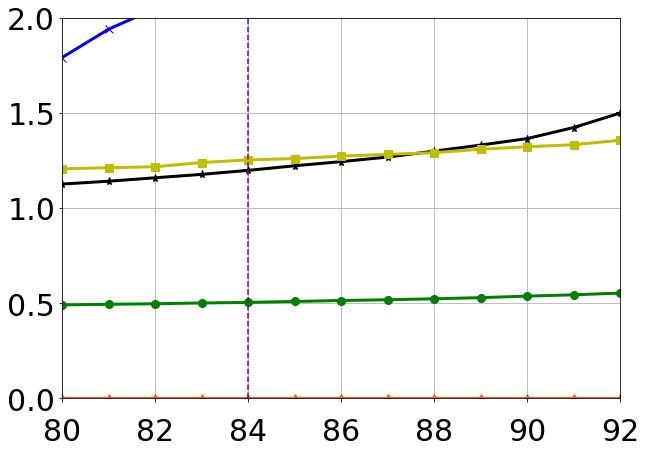

In [ ]:
# 3
ae_meanY = [2.82e-08, 3.78e-08, 4.16e-08, 4.36e-08, 4.51e-08, 4.63e-08, 4.72e-08, 4.82e-08, 4.92e-08, 5.01e-08, 5.09e-08, 5.17e-08, 5.24e-08, 5.3e-08, 5.37e-08, 5.43e-08, 5.49e-08, 5.55e-08, 5.6e-08, 5.65e-08, 5.71e-08, 5.76e-08, 5.81e-08, 5.86e-08, 5.91e-08, 5.96e-08, 6.01e-08, 6.07e-08, 6.11e-08, 6.16e-08, 6.21e-08, 6.26e-08, 6.32e-08, 6.37e-08, 6.42e-08, 6.46e-08, 6.51e-08, 6.56e-08, 6.61e-08, 6.67e-08, 6.72e-08, 6.76e-08, 6.81e-08, 6.88e-08, 6.93e-08, 6.98e-08, 7.03e-08, 7.08e-08, 7.13e-08, 7.18e-08, 7.23e-08, 7.28e-08, 7.32e-08, 7.37e-08, 7.43e-08, 7.48e-08, 7.53e-08, 7.58e-08, 7.64e-08, 7.69e-08, 7.74e-08, 7.79e-08, 7.85e-08, 7.9e-08, 7.95e-08, 8.02e-08, 8.08e-08, 8.14e-08, 8.2e-08, 8.27e-08, 8.35e-08, 8.41e-08, 8.49e-08, 8.55e-08, 8.63e-08, 8.7e-08, 8.77e-08, 8.85e-08, 8.93e-08, 9.01e-08, 9.12e-08, 9.21e-08, 9.31e-08, 9.42e-08, 9.55e-08, 9.68e-08, 9.84e-08, 9.99e-08, 1.016e-07, 1.036e-07, 1.064e-07, 1.102e-07, 1.169e-07]
ae_AnomalyY = [2.51e-08, 3.7e-08, 4.1e-08, 4.36e-08, 4.55e-08, 4.62e-08, 4.73e-08, 4.81e-08, 4.92e-08, 5.01e-08, 5.08e-08, 5.17e-08, 5.24e-08, 5.3e-08, 5.37e-08, 5.43e-08, 5.49e-08, 5.56e-08, 5.61e-08, 5.66e-08, 5.7e-08, 5.76e-08, 5.82e-08, 5.87e-08, 5.92e-08, 5.97e-08, 6.02e-08, 6.06e-08, 6.11e-08, 6.15e-08, 6.22e-08, 6.27e-08, 6.32e-08, 6.36e-08, 6.42e-08, 6.46e-08, 6.5e-08, 6.56e-08, 6.61e-08, 6.67e-08, 6.72e-08, 6.77e-08, 6.82e-08, 6.88e-08, 6.94e-08, 6.99e-08, 7.04e-08, 7.09e-08, 7.14e-08, 7.18e-08, 7.22e-08, 7.28e-08, 7.32e-08, 7.37e-08, 7.43e-08, 7.49e-08, 7.53e-08, 7.58e-08, 7.63e-08, 7.69e-08, 7.74e-08, 7.8e-08, 7.84e-08, 7.89e-08, 7.94e-08, 8e-08, 8.08e-08, 8.14e-08, 8.21e-08, 8.27e-08, 8.35e-08, 8.41e-08, 8.48e-08, 8.55e-08, 8.63e-08, 8.7e-08, 8.76e-08, 8.84e-08, 8.93e-08, 9.01e-08, 9.11e-08, 9.18e-08, 9.31e-08, 9.41e-08, 9.53e-08, 9.69e-08, 9.85e-08, 9.98e-08, 1.019e-07, 1.035e-07, 1.066e-07, 1.101e-07, 1.163e-07]

tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_meanY = [0.098, 0.172, 0.187, 0.196, 0.207, 0.212, 0.223, 0.246, 0.255, 0.262, 0.272, 0.279, 0.286, 0.297, 0.304, 0.313, 0.316, 0.32, 0.326, 0.334, 0.337, 0.341, 0.343, 0.346, 0.349, 0.355, 0.361, 0.364, 0.368, 0.374, 0.378, 0.381, 0.383, 0.386, 0.388, 0.392, 0.394, 0.398, 0.4, 0.402, 0.404, 0.407, 0.409, 0.411, 0.414, 0.416, 0.418, 0.42, 0.423, 0.425, 0.427, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.442, 0.444, 0.446, 0.448, 0.45, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.471, 0.474, 0.476, 0.479, 0.481, 0.483, 0.485, 0.488, 0.49, 0.493, 0.496, 0.5, 0.505, 0.508, 0.512, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]
# tsne_AnomalyY = [0.106, 0.185, 0.202, 0.21, 0.218, 0.222, 0.236, 0.263, 0.269, 0.273, 0.286, 0.295, 0.299, 0.307, 0.314, 0.318, 0.322, 0.327, 0.331, 0.335, 0.338, 0.341, 0.344, 0.346, 0.351, 0.355, 0.36, 0.362, 0.365, 0.376, 0.379, 0.383, 0.385, 0.388, 0.391, 0.393, 0.396, 0.399, 0.401, 0.403, 0.405, 0.407, 0.409, 0.412, 0.414, 0.416, 0.419, 0.421, 0.423, 0.426, 0.428, 0.43, 0.432, 0.434, 0.435, 0.437, 0.439, 0.441, 0.443, 0.445, 0.447, 0.449, 0.451, 0.453, 0.455, 0.457, 0.459, 0.461, 0.463, 0.465, 0.467, 0.47, 0.472, 0.475, 0.477, 0.479, 0.482, 0.484, 0.487, 0.489, 0.491, 0.494, 0.497, 0.501, 0.504, 0.509, 0.514, 0.518, 0.523, 0.529, 0.537, 0.544, 0.553]

# pca_meanY = [0.171, 0.232, 0.251, 0.265, 0.274, 0.283, 0.295, 0.322, 0.329, 0.334, 0.338, 0.341, 0.345, 0.348, 0.351, 0.353, 0.356, 0.359, 0.362, 0.365, 0.368, 0.371, 0.374, 0.378, 0.382, 0.386, 0.39, 0.394, 0.4, 0.484, 0.5, 0.51, 0.515, 0.52, 0.524, 0.528, 0.531, 0.535, 0.538, 0.54, 0.543, 0.545, 0.547, 0.551, 0.553, 0.555, 0.557, 0.559, 0.562, 0.564, 0.565, 0.567, 0.569, 0.571, 0.573, 0.575, 0.577, 0.579, 0.582, 0.584, 0.586, 0.589, 0.591, 0.593, 0.595, 0.597, 0.599, 0.601, 0.603, 0.605, 0.607, 0.609, 0.611, 0.616, 0.619, 0.621, 0.623, 0.626, 0.629, 0.632, 0.634, 0.637, 0.64, 0.644, 0.647, 0.65, 0.654, 0.659, 0.664, 0.669, 0.675, 0.684, 0.7]
pca_meanY = [0.385, 0.579, 0.623, 0.646, 0.663, 0.677, 0.688, 0.708, 0.726, 0.741, 0.753, 0.764, 0.772, 0.783, 0.793, 0.806, 0.818, 0.828, 0.836, 0.845, 0.854, 0.861, 0.868, 0.875, 0.883, 0.889, 0.897, 0.903, 0.91, 0.919, 0.927, 0.935, 0.942, 0.951, 0.957, 0.962, 0.967, 0.973, 0.978, 0.984, 0.99, 0.995, 1.001, 1.006, 1.011, 1.016, 1.021, 1.026, 1.032, 1.037, 1.042, 1.046, 1.051, 1.056, 1.062, 1.067, 1.071, 1.078, 1.083, 1.087, 1.09, 1.096, 1.1, 1.105, 1.111, 1.116, 1.123, 1.129, 1.135, 1.14, 1.145, 1.152, 1.158, 1.163, 1.168, 1.173, 1.178, 1.185, 1.191, 1.196, 1.203, 1.209, 1.215, 1.226, 1.238, 1.246, 1.258, 1.267, 1.277, 1.293, 1.305, 1.317, 1.333]
# pca_AnomalyY = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.008, 0.008, 0.016, 0.017, 0.025, 0.029, 0.037, 0.037, 0.046, 0.055, 0.065, 0.494, 0.506, 0.514, 0.518, 0.523, 0.526, 0.529, 0.532, 0.537, 0.54, 0.542, 0.544, 0.546, 0.548, 0.552, 0.555, 0.556, 0.558, 0.56, 0.563, 0.565, 0.567, 0.568, 0.57, 0.572, 0.574, 0.576, 0.578, 0.58, 0.584, 0.585, 0.588, 0.59, 0.592, 0.595, 0.597, 0.599, 0.601, 0.603, 0.605, 0.607, 0.609, 0.611, 0.613, 0.619, 0.622, 0.624, 0.626, 0.629, 0.632, 0.634, 0.637, 0.64, 0.642, 0.647, 0.65, 0.654, 0.658, 0.663, 0.669, 0.675, 0.682, 0.693, 0.717]
pca_AnomalyY = [0.014, 0.215, 0.3, 0.346, 0.396, 0.431, 0.462, 0.531, 0.573, 0.602, 0.628, 0.646, 0.659, 0.701, 0.725, 0.748, 0.764, 0.775, 0.786, 0.804, 0.818, 0.826, 0.838, 0.847, 0.863, 0.868, 0.878, 0.888, 0.895, 0.914, 0.922, 0.931, 0.939, 0.948, 0.954, 0.959, 0.964, 0.97, 0.976, 0.982, 0.988, 0.993, 1.0, 1.005, 1.01, 1.015, 1.02, 1.025, 1.031, 1.037, 1.041, 1.046, 1.05, 1.056, 1.062, 1.066, 1.071, 1.078, 1.083, 1.087, 1.091, 1.097, 1.101, 1.107, 1.112, 1.118, 1.124, 1.131, 1.137, 1.141, 1.146, 1.153, 1.158, 1.164, 1.17, 1.175, 1.179, 1.188, 1.193, 1.198, 1.206, 1.212, 1.217, 1.239, 1.253, 1.26, 1.273, 1.282, 1.291, 1.309, 1.322, 1.333, 1.356]

# mds_meanY = [0.136, 0.185, 0.212, 0.228, 0.239, 0.251, 0.261, 0.269, 0.277, 0.286, 0.293, 0.3, 0.308, 0.316, 0.323, 0.33, 0.337, 0.345, 0.352, 0.362, 0.373, 0.385, 0.398, 0.414, 0.433, 0.451, 0.472, 0.488, 0.502, 0.515, 0.525, 0.532, 0.54, 0.545, 0.55, 0.555, 0.559, 0.562, 0.566, 0.569, 0.573, 0.577, 0.58, 0.583, 0.586, 0.589, 0.592, 0.595, 0.597, 0.6, 0.603, 0.607, 0.61, 0.613, 0.615, 0.618, 0.621, 0.624, 0.628, 0.631, 0.635, 0.639, 0.642, 0.645, 0.649, 0.653, 0.658, 0.663, 0.668, 0.675, 0.681, 0.688, 0.693, 0.701, 0.709, 0.717, 0.725, 0.734, 0.744, 0.755, 0.769, 0.784, 0.798, 0.815, 0.837, 0.859, 0.886, 0.92, 0.956, 0.996, 1.035, 1.079, 1.118]
mds_meanY = [0.287, 0.401, 0.45, 0.478, 0.499, 0.516, 0.536, 0.557, 0.573, 0.588, 0.602, 0.615, 0.629, 0.643, 0.654, 0.666, 0.675, 0.683, 0.692, 0.701, 0.711, 0.721, 0.729, 0.738, 0.746, 0.753, 0.762, 0.769, 0.777, 0.784, 0.791, 0.798, 0.804, 0.81, 0.817, 0.823, 0.83, 0.837, 0.843, 0.85, 0.855, 0.86, 0.867, 0.872, 0.877, 0.882, 0.888, 0.893, 0.899, 0.904, 0.908, 0.913, 0.917, 0.922, 0.927, 0.931, 0.937, 0.943, 0.947, 0.952, 0.957, 0.962, 0.968, 0.974, 0.98, 0.985, 0.99, 0.997, 1.004, 1.011, 1.019, 1.027, 1.035, 1.044, 1.054, 1.063, 1.074, 1.085, 1.097, 1.108, 1.12, 1.134, 1.151, 1.169, 1.191, 1.211, 1.235, 1.26, 1.289, 1.318, 1.35, 1.388, 1.44]
# mds_AnomalyY = [0.003, 0.007, 0.007, 0.01, 0.013, 0.017, 0.019, 0.02, 0.027, 0.034, 0.037, 0.038, 0.038, 0.043, 0.046, 0.046, 0.055, 0.06, 0.08, 0.089, 0.097, 0.142, 0.175, 0.218, 0.285, 0.344, 0.405, 0.467, 0.49, 0.523, 0.53, 0.537, 0.543, 0.548, 0.552, 0.556, 0.561, 0.564, 0.567, 0.571, 0.574, 0.578, 0.581, 0.584, 0.587, 0.59, 0.593, 0.596, 0.598, 0.601, 0.605, 0.608, 0.611, 0.614, 0.616, 0.62, 0.622, 0.626, 0.629, 0.633, 0.637, 0.641, 0.644, 0.647, 0.651, 0.655, 0.66, 0.665, 0.67, 0.676, 0.683, 0.689, 0.693, 0.704, 0.71, 0.718, 0.728, 0.735, 0.745, 0.756, 0.77, 0.781, 0.791, 0.817, 0.838, 0.855, 0.881, 0.924, 0.972, 1.015, 1.057, 1.106, 1.145]
mds_AnomalyY = [0.054, 0.173, 0.226, 0.275, 0.33, 0.372, 0.418, 0.459, 0.484, 0.509, 0.54, 0.556, 0.579, 0.607, 0.626, 0.638, 0.649, 0.661, 0.671, 0.68, 0.692, 0.705, 0.716, 0.727, 0.738, 0.746, 0.754, 0.764, 0.77, 0.782, 0.789, 0.796, 0.803, 0.809, 0.816, 0.822, 0.829, 0.836, 0.843, 0.849, 0.854, 0.86, 0.866, 0.871, 0.877, 0.882, 0.888, 0.894, 0.899, 0.904, 0.908, 0.913, 0.918, 0.922, 0.927, 0.932, 0.938, 0.943, 0.948, 0.953, 0.958, 0.964, 0.969, 0.975, 0.981, 0.986, 0.993, 0.999, 1.006, 1.013, 1.021, 1.03, 1.039, 1.047, 1.058, 1.068, 1.079, 1.089, 1.101, 1.113, 1.126, 1.141, 1.159, 1.177, 1.198, 1.222, 1.244, 1.268, 1.299, 1.331, 1.365, 1.423, 1.499]

sdsocp_meanY = [0.052, 0.087, 0.103, 0.119, 0.129, 0.138, 0.151, 0.162, 0.17, 0.18, 0.186, 0.194, 0.201, 0.208, 0.214, 0.219, 0.227, 0.233, 0.239, 0.245, 0.251, 0.257, 0.262, 0.268, 0.276, 0.283, 0.29, 0.299, 0.305, 0.314, 0.323, 0.329, 0.336, 0.343, 0.351, 0.36, 0.369, 0.378, 0.388, 0.397, 0.406, 0.421, 0.432, 0.443, 0.454, 0.466, 0.475, 0.486, 0.496, 0.508, 0.519, 0.532, 0.55, 0.57, 0.587, 0.603, 0.623, 0.642, 0.664, 0.683, 0.704, 0.73, 0.75, 0.771, 0.794, 0.826, 0.857, 0.887, 0.911, 0.955, 0.997, 1.037, 1.088, 1.126, 1.216, 1.286, 1.355, 1.449, 1.534, 1.636, 1.773, 1.928, 2.031, 2.677, 3.089, 8.32, 16.685, 17.009, 17.699, 47.093, 49.156, 56.151, 219.496]
sdsocp_AnomalyY = [0.01, 0.046, 0.065, 0.078, 0.093, 0.109, 0.12, 0.137, 0.145, 0.154, 0.165, 0.175, 0.186, 0.193, 0.2, 0.209, 0.219, 0.227, 0.234, 0.24, 0.246, 0.252, 0.258, 0.265, 0.271, 0.28, 0.287, 0.297, 0.305, 0.316, 0.322, 0.33, 0.336, 0.344, 0.351, 0.359, 0.371, 0.38, 0.389, 0.398, 0.407, 0.419, 0.431, 0.446, 0.456, 0.466, 0.478, 0.489, 0.501, 0.511, 0.52, 0.531, 0.553, 0.575, 0.59, 0.607, 0.622, 0.646, 0.666, 0.687, 0.706, 0.733, 0.751, 0.771, 0.801, 0.835, 0.858, 0.887, 0.917, 0.954, 0.999, 1.033, 1.081, 1.132, 1.217, 1.272, 1.367, 1.47, 1.536, 1.652, 1.791, 1.94, 2.048, 2.687, 3.17, 8.075, 14.032, 17.08, 17.755, 42.376, 52.533, 56.301, 219.746]

# sdp_meanY = [0.072, 0.12, 0.142, 0.163, 0.183, 0.196, 0.209, 0.225, 0.238, 0.253, 0.264, 0.278, 0.288, 0.296, 0.305, 0.315, 0.325, 0.333, 0.343, 0.35, 0.362, 0.373, 0.383, 0.394, 0.407, 0.419, 0.428, 0.44, 0.457, 0.47, 0.483, 0.496, 0.51, 0.523, 0.54, 0.554, 0.567, 0.58, 0.591, 0.603, 0.621, 0.638, 0.653, 0.671, 0.688, 0.705, 0.724, 0.743, 0.762, 0.778, 0.798, 0.82, 0.842, 0.861, 0.884, 0.906, 0.938, 0.96, 0.982, 1.016, 1.047, 1.075, 1.102, 1.136, 1.18, 1.224, 1.272, 1.319, 1.365, 1.413, 1.469, 1.549, 1.619, 1.682, 1.807, 1.934, 2.031, 2.2, 2.334, 2.498, 2.617, 2.839, 3.106, 3.706, 4.355, 4.883, 6.387, 7.062, 8.553, 14.371, 15.695, 18.699, 56.124]
# sdp_AnomalyY = [0.068, 0.107, 0.138, 0.158, 0.18, 0.195, 0.209, 0.221, 0.24, 0.254, 0.262, 0.274, 0.286, 0.297, 0.305, 0.316, 0.328, 0.336, 0.345, 0.354, 0.365, 0.375, 0.387, 0.396, 0.408, 0.418, 0.427, 0.44, 0.455, 0.469, 0.48, 0.496, 0.51, 0.52, 0.537, 0.551, 0.566, 0.58, 0.593, 0.606, 0.622, 0.639, 0.654, 0.671, 0.69, 0.706, 0.721, 0.739, 0.763, 0.781, 0.799, 0.819, 0.838, 0.858, 0.886, 0.907, 0.937, 0.962, 0.987, 1.016, 1.046, 1.071, 1.097, 1.132, 1.174, 1.221, 1.267, 1.325, 1.362, 1.416, 1.474, 1.549, 1.626, 1.695, 1.808, 1.926, 2.041, 2.214, 2.353, 2.49, 2.613, 2.851, 3.091, 3.74, 4.353, 4.895, 6.641, 7.009, 8.423, 14.021, 16.624, 18.849, 59.089]

import matplotlib.pyplot as plt
import numpy as np
fig, ax1 = plt.subplots(1,1, figsize = (10,7))

ax1.plot(x,np.array(tsne_AnomalyY), label= "T-SNE-based",linestyle='-', c='g', linewidth=3, marker = 'o', markersize=8)
ax1.plot(x,np.array(mds_AnomalyY), label= "MDS-based",linestyle='-', c='black', linewidth=3, marker = '*', markersize=8)
ax1.plot(x,np.array(pca_AnomalyY), label= "PCA-based",linestyle='-', c='y', linewidth=3, marker = 's', markersize=8)
ax1.plot(x,np.array(ae_AnomalyY), label= "AE-based",linestyle='-', c='#FF5809', linewidth=3, marker = '^', markersize=8)
ax1.plot(x,np.array(sdsocp_AnomalyY), label= "Proposed",linestyle='-', c='b', linewidth=3, marker = 'x', markersize=8)

font_size = 30

plt.axvline(x = 84, color = 'purple', ls='--')

# ax1.legend(loc='upper right', prop={'size': font_size})
# ax1.set_xlabel('Segment index', fontsize=font_size)
# ax1.set_ylabel(r'REs [$m^2$]', fontsize=font_size)

x_min = 80
x_max = 92
step_x = 2
print(np.arange(x_min, x_max+step_x, step_x))
x_axis = np.arange(x_min, x_max+step_x, step_x)
x_axis_string = list(map(lambda x: str(x), np.arange(x_min, x_max+1, step_x)))

y_min = 0
y_max = 2
step_y = 0.5
print(np.arange(y_min, y_max+step_y, step_y))
y_axis = np.arange(y_min, y_max+step_y, step_y)
y_axis_string = list(map(lambda y: str(y), np.arange(y_min, y_max+1, step_y)))

ax1.set_ylim([y_min, y_max])
ax1.set_xlim([x_min, x_max])
plt.xticks(x_axis, x_axis_string, fontsize=font_size)
plt.tick_params(axis='x', pad=15)
plt.yticks(y_axis, y_axis_string, fontsize=font_size)
plt.grid()

plt.savefig("anomaly_detection_reconstruction_error_3_3anomaly_specialZoomIn.png", bbox_inches='tight')
plt.savefig("anomaly_detection_reconstruction_error_3_3anomaly_specialZoomIn.eps", bbox_inches='tight')
# files.download("anomaly_detection_reconstruction_error_3_3anomaly.eps")

In [ ]:
files.download("anomaly_detection_reconstruction_error_03_3anomaly_specialZoomIn.png")
files.download("anomaly_detection_reconstruction_error_3_3anomaly_specialZoomIn.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>